## **Problem Statement**

### **Domain**: Industrial safety. NLP based Chatbot

### **Context**

The  database  comes  fromone  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environmen

### **Data Description**

This database  is  basically  records  of  accidents  from
12  different  plants  in  03  different  countries
which  every  line  in  the  data  is  an
occurrence of an accident.

Columns description:

- **Data**: timestamp or time/date information
- **Countries**: which country the accident occurred (anonymised)
- **Local**: the city where the manufacturing plant is located (anonymised)
- **Industry sector**: which sector the plant belongs to
- **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
- **Genre**: if the person is male of female
- **Employee or Third Party**: if the injured person is an employee or a third party
- **Critical Risk**: some description of the risk involved in the accident
- **Description**: Detailed description of how the accident happened.

### **Project Objective**

Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

## **Method 1: Data Preprocessing + NLP Augmentation + Data Cleansing + GloVe Embeddings + Model Evaluation**

* Target variable: Potential Accident Level
* Potential Accident Level Augmentation: NLP Augmentation
* Description augmentation method: Word substitution using GLoVe word embeddings


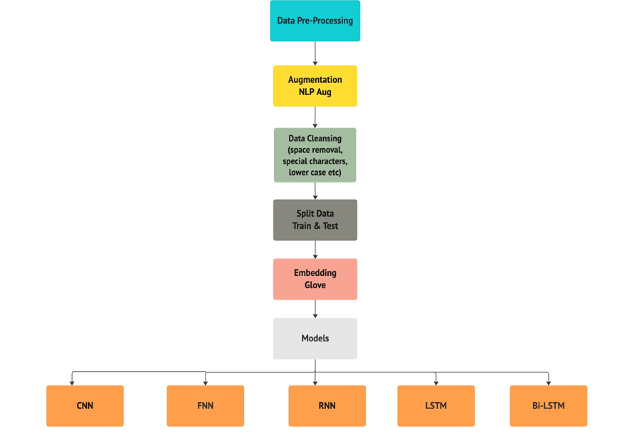

In [ ]:
!pip install nlpaug
!pip install tensorflow-text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.cloud import storage

# Initialize the random number generator
import random
np.random.seed(100)

import re
import os
import string
import pickle

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import gensim

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant

from tensorflow.keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataFile = '/content/drive/MyDrive/NLP1-G4/data.csv'
gloveFile100d = '/content/drive/MyDrive/NLP1-G4/glove.6B.100d.txt'
gloveFile50d = '/content/drive/MyDrive/NLP1-G4/glove.6B.50d.txt'
# Using Panda to read csv file
df = pd.read_csv(dataFile,encoding='latin1')

df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 0:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 0:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 0:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 0:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 0:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
df.shape

(425, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [ ]:
# Replace method which would replace new line character with empty space.
df = df.replace('\n', '', regex=True)

In [ ]:
df['Desc_count'] = df['Description'].apply(lambda x: len(x))

In [ ]:
df['Potential Accident Level'].value_counts()

,count
Potential Accident Level,
IV,143
III,106
II,95
I,49
V,31
VI,1


In [ ]:
# Potential Accident Level VI has only 1 record which would be of no use hence dropping that record.
df.drop([307], inplace = True)

In [ ]:
df['Potential Accident Level'].value_counts()

,count
Potential Accident Level,
IV,143
III,106
II,95
I,49
V,31


In [ ]:
# Removing unwanted columns.
df.drop(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk', 'Desc_count'], axis=1, inplace=True)

In [ ]:
df.head()

,Potential Accident Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...
1,IV,During the activation of a sodium sulphide pum...
2,III,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Rename the columns in a correct fashion
df.rename(columns = { 'Potential Accident Level' : 'Potential_Accident_Level'}, inplace = True)

In [ ]:
df.head()

,Potential_Accident_Level,Description
0,IV,While removing the drill rod of the Jumbo 08 f...
1,IV,During the activation of a sodium sulphide pum...
2,III,In the sub-station MILPO located at level +170...
3,I,Being 9:45 am. approximately in the Nv. 1880 C...
4,IV,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Creating Separate dataframes as per Potential Accident level.
Potential_Accident_Level_I   = df[df['Potential_Accident_Level'] == 'I']
Potential_Accident_Level_II  = df[df['Potential_Accident_Level'] == 'II']
Potential_Accident_Level_III = df[df['Potential_Accident_Level'] == 'III']
Potential_Accident_Level_IV  = df[df['Potential_Accident_Level'] == 'IV']
Potential_Accident_Level_V   = df[df['Potential_Accident_Level'] == 'V']

In [ ]:
# Using NLPAug to fill imbalance data. Here NLPAug is using GLoVe model for augmentation.
aug_w2v = naw.WordEmbsAug(model_type='glove', model_path=gloveFile100d, action="substitute")

In [ ]:
# Augment 93 records for Potential Accident Level - I
Potential_Accident_Level_I_df_sample   = Potential_Accident_Level_I.sample(n=93, replace=True)

# Augment 50 records for Potential Accident Level - II
Potential_Accident_Level_II_df_sample  = Potential_Accident_Level_II.sample(n=50, replace=True)

# Augment 36 records for Potential Accident Level - III
Potential_Accident_Level_III_df_sample = Potential_Accident_Level_III.sample(n=36, replace=True)

# Augment 113 records for Potential Accident Level - V
Potential_Accident_Level_V_df_sample   = Potential_Accident_Level_V.sample(n=113, replace=True)

In [ ]:
# Function to actually augment the description data
from tqdm import tqdm

def augmentText(potential_accident_level_df):
    for i, row in tqdm(potential_accident_level_df.iterrows(), total=potential_accident_level_df.shape[0]):
        potential_accident_level_df.at[i, 'Description'] = aug_w2v.augment(row['Description'])

In [ ]:
# Invoke  function, to augment 93 records for Potential Accident Level - I
augmentText(Potential_Accident_Level_I_df_sample)

# Invoke  function, to augment 50 records for Potential Accident Level - II
augmentText(Potential_Accident_Level_II_df_sample)

# Invoke  function, to augment 36 records for Potential Accident Level - III
augmentText(Potential_Accident_Level_III_df_sample)

# Invoke function, to augment 113 records for Potential Accident Level - V
augmentText(Potential_Accident_Level_V_df_sample)

100%|██████████| 113/113 [00:42<00:00,  2.69it/s]


In [ ]:
# Concatenating Augmented dataframes.
dataframes = [df, Potential_Accident_Level_I_df_sample, Potential_Accident_Level_II_df_sample, Potential_Accident_Level_III_df_sample, Potential_Accident_Level_V_df_sample]
df_balanced = pd.concat(dataframes)

# Shuffling the records in dataframe as they do remain grouped after concatenation.
df_balanced = df_balanced.sample(frac = 1).reset_index(drop=True)

In [ ]:
df_balanced.shape

(716, 2)

In [ ]:
df_balanced['Potential_Accident_Level'].value_counts()

,count
Potential_Accident_Level,
II,145
V,144
IV,143
I,142
III,142


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Potential_Accident_Level  716 non-null    object
 1   Description               716 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


## Data pre-processing

In [ ]:
# displaying Description data from text column for one row
df_balanced['Description'][1]

['At level - 1398 - Access 6 A2 - at times when for engineer trainee planamieto entered to verify the amount of split set placed by the Scissor 184 in the support - holding of notebook and pen in his left hand - while repairing the roof of the work, he lost when balance when stepping on a rock holding the right hand on a rock on the floor thereby set injury. The worker at there time of the accident wore gloves but done not use them because it made it difficult to take given.']

In [ ]:
# Replaces extra spaces between words with single space
# Handle missing values and ensure all are strings
df_balanced['Description'] = df_balanced['Description'].fillna('')  # Replace NaN with empty string

# Clean descriptions by replacing non-alphabetic characters with a single space
df_balanced['Clean_Desc'] = df_balanced['Description'].apply(
    lambda x: re.sub(r'[^A-Za-z]+', ' ', str(x))  # Ensure string conversion
)

In [ ]:
# displaying Description data from text column for the above row
df_balanced['Clean_Desc'][1]

' At level Access A at times when for engineer trainee planamieto entered to verify the amount of split set placed by the Scissor in the support holding of notebook and pen in his left hand while repairing the roof of the work he lost when balance when stepping on a rock holding the right hand on a rock on the floor thereby set injury The worker at there time of the accident wore gloves but done not use them because it made it difficult to take given '

In [ ]:
# Changes text to lowercase
df_balanced['Clean_Desc'] = df_balanced['Clean_Desc'].apply(lambda x: x.lower())

In [ ]:
# Remove spaces at the beginning and at the end of the string
df_balanced['Clean_Desc'] = df_balanced['Clean_Desc'].apply(lambda x: x.strip())

In [ ]:
df_balanced['Clean_Desc'] = df_balanced['Clean_Desc'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# To remove stopwords
df_balanced['Clean_Desc'] = df_balanced['Clean_Desc'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

In [ ]:
df_balanced['Clean_Desc'][1]

'level access times engineer trainee planamieto entered verify amount split set placed scissor support holding notebook pen left hand repairing roof work lost balance stepping rock holding right hand rock floor thereby set injury worker time accident wore gloves done use made difficult take given'

In [ ]:
df_balanced.head()

,Potential_Accident_Level,Description,Clean_Desc
0,IV,During the execution of the task of assembling...,execution task assembling box testimony boxes ...
1,II,[At level - 1398 - Access 6 A2 - at times when...,level access times engineer trainee planamieto...
2,IV,Mr. Jesus operator of the concrete throwing te...,mr jesus operator concrete throwing team alpha...
3,II,"At 10:00 a.m., when the assistant cleaned the ...",assistant cleaned floor module e central camp ...
4,IV,Once the mooring of the faneles in the detonat...,mooring faneles detonating cord completed inju...


In [ ]:
df_balanced.drop(['Description'], axis=1, inplace=True)

In [ ]:
def text_cleansing(text):
    text = text.lower()

    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [ ]:
def token_cleansing(df):
    head_lines = list()
    lines = df["Clean_Desc"].values.tolist()

    for line in lines:
        line = text_cleansing(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        # remove stop words
        words = [w for w in words if not w in stopwords]
        head_lines.append(words)
    return head_lines

(-0.5, 999.5, 499.5, -0.5)

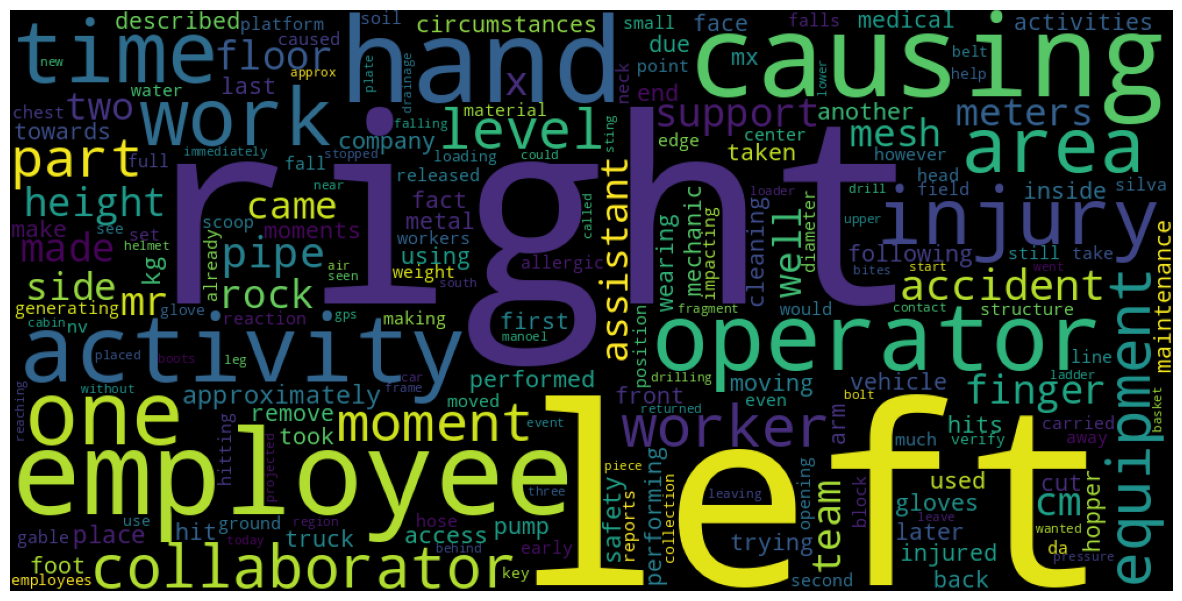

In [ ]:
desc_lines = token_cleansing(df_balanced)
pos_lines = [j for sub in desc_lines for j in sub]
desc_wordCloud_dict=Counter(pos_lines)

desc_wordCloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(desc_wordCloud_dict)
plt.figure(figsize=(15,8))
plt.imshow(desc_wordCloud)
plt.axis("off")

In [ ]:
ignore_words = ['?', '!']
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w) for desc_outer in desc_lines for w in desc_outer if w not in ignore_words]
desc_words = sorted(list(set(words)))

In [ ]:
# For CountVectorizer its Count, for TFIDFVectorizer its TFIDF
# & for Tokenizer its Token
class Vectorizer():
    def __init__(self, vectorName):
        self.vectorName = vectorName
        if (self.vectorName == 'Count'):
            self.vector = CountVectorizer()
        elif (self.vectorName == 'TFIDF'):
            self.vector = TfidfVectorizer()
        elif (self.vectorName == 'Token'):
            self.vector = Tokenizer()

    def fit(self, text):
        if (self.vectorName == 'Token'):
            self.vector.fit_on_texts(text)
        else:
            self.vector.fit(text)

    def fit_transform(self, text):
        if (self.vectorName != 'Token'):
            return self.vector.fit_transform(text)

    def texts_to_sequences(self, text):
        lineText = ''
        if (self.vectorName == 'Token'):
            return self.vector.texts_to_sequences(text)
        else:
            textList = []
            for line in text:
                for l in line:
                    if lineText == '':
                        lineText = l
                    else:
                        lineText = lineText + " " + l
                textList.append(lineText)
            return textList

    def uniqueTokens(self):
        if (self.vectorName == 'Token'):
            return self.vector.word_index
        else:
            return self.vector.vocabulary_

    def vocabularySize(self):
        return (len(self.uniqueTokens()) + 1)


In [ ]:
# Function to get Pad sequences Milestone 2
def fetch_pad_sequence(vectorizedWords, maxLen):
    if (type(vectorizedWords) == list):
        linesPad = sequence.pad_sequences(vectorizedWords, maxlen=maxLen, padding='post')
    else:
        linesPad = sequence.pad_sequences(vectorizedWords.toarray(), maxlen=maxLen, padding='post')
    return linesPad

In [ ]:
# Function to generate indices & shuffle Milestone 2
def generate_indices(endRange):
    indices = np.arange(endRange)
    np.random.shuffle(indices)
    return indices

In [ ]:
# Function for Train Test Split Milestone 2
def dataSplit(split, X, y):
    splitValue  = int(split * X.shape[0])

    X_train = X[:-splitValue]
    y_train = y[:-splitValue]
    X_test  = X[-splitValue:]
    y_test  = y[-splitValue:]

    return X_train, y_train, X_test, y_test

In [ ]:
# To get a vector using CountVectorizer Milestone 2
cntVector = Vectorizer('Count')
seqDesc = cntVector.texts_to_sequences(desc_lines)
cntBow = cntVector.fit_transform(seqDesc)

wordIdxCntVtr = cntVector.uniqueTokens()
vocabSizeCntVtr = cntVector.vocabularySize()

print(cntBow.shape)
print("unique tokens - {}".format(len(wordIdxCntVtr)))
print('Vocab length is {}'.format(vocabSizeCntVtr))

(716, 3656)
unique tokens - 3656
Vocab length is 3657


In [ ]:
# To get a vector using TF-IDFVectorizer
tfidfVector = Vectorizer('TFIDF')
tfidfSeqDesc = tfidfVector.texts_to_sequences(desc_lines)
tfidfBow = tfidfVector.fit_transform(tfidfSeqDesc)

wordIdxTfidfVtr = tfidfVector.uniqueTokens()
vocabSizeTfidfVtr = tfidfVector.vocabularySize()

print(tfidfBow.shape)
print("unique tokens - {}".format(len(wordIdxTfidfVtr)))
print('Vocab length is {}'.format(vocabSizeTfidfVtr))

(716, 3656)
unique tokens - 3656
Vocab length is 3657


In [ ]:
# To get a vector using Tokenizer Milestone 2
tokenizerVector = Vectorizer('Token')
tokenizerVector.fit(desc_lines)
tokenSeqDesc = tokenizerVector.texts_to_sequences(desc_lines)

wordIdxTkn = tokenizerVector.uniqueTokens()
vocabSizeTkn = tokenizerVector.vocabularySize()

print("unique tokens - {}".format(len(wordIdxTkn)))
print('Vocab length is {}'.format(vocabSizeTkn))

unique tokens - 3672
Vocab length is 3673


In [ ]:
# Getting padded sequences for vectorizer which was generated using CountVectorizer Milestone 2
cntLinesPad = fetch_pad_sequence(cntBow, 370)
print('cntLinesPad shape is {}'.format(cntLinesPad.shape))

# Getting padded sequences for vectorizer which was generated using TF-IDFVectorizer
tfidfLinesPad = fetch_pad_sequence(tfidfBow, 370)
print('tfidfLinesPad shape is {}'.format(tfidfLinesPad.shape))

# Getting padded sequences for vectorizer which was generated using Tokenizer
tokenLinesPad = fetch_pad_sequence(tokenSeqDesc, 370)
print('tokenLinesPad shape is {}'.format(tokenLinesPad.shape))

cntLinesPad shape is (716, 370)
tfidfLinesPad shape is (716, 370)
tokenLinesPad shape is (716, 370)


In [ ]:
shuffledIndices = generate_indices(cntLinesPad.shape[0])

In [ ]:
PAL =  df_balanced['Potential_Accident_Level'].values

In [ ]:
cntLinesPad = cntLinesPad[shuffledIndices]
print('cntLinesPad.shape {}'.format(cntLinesPad.shape))

tfidfLinesPad = tfidfLinesPad[shuffledIndices]
print('tfidfLinesPad.shape {}'.format(tfidfLinesPad.shape))

tokenLinesPad = tokenLinesPad[shuffledIndices]
print('tokenLinesPad.shape {}'.format(tokenLinesPad.shape))

PAL = PAL[shuffledIndices]
print('PAL.shape {}'.format(PAL.shape))

cntLinesPad.shape (716, 370)
tfidfLinesPad.shape (716, 370)
tokenLinesPad.shape (716, 370)
PAL.shape (716,)


In [ ]:
# Creating train test split
validation_split = 0.3
X_trainCnt, y_trainCnt, X_testCnt, y_testCnt = dataSplit(validation_split, cntLinesPad, PAL)
X_trainTfidf, y_trainTfidf, X_testTfidf, y_testTfidf = dataSplit(validation_split, tfidfLinesPad, PAL)
X_trainToken, y_trainToken, X_testToken, y_testToken = dataSplit(validation_split, tokenLinesPad, PAL)

In [ ]:
print('Shape of X_trainCnt:', X_trainCnt.shape)
print('Shape of y_trainCnt:', y_trainCnt.shape)
print('Shape of X_testCnt:', X_testCnt.shape)
print('Shape of y_testCnt:', y_testCnt.shape)
print('===============================================')
print('Shape of X_trainTfidf:', X_trainTfidf.shape)
print('Shape of y_trainTfidf:', y_trainTfidf.shape)
print('Shape of X_testTfidf:', X_testTfidf.shape)
print('Shape of y_testTfidf:', y_testTfidf.shape)
print('===============================================')
print('Shape of X_trainToken:', X_trainToken.shape)
print('Shape of y_trainToken:', y_trainToken.shape)
print('Shape of X_testToken:', X_testToken.shape)
print('Shape of y_testToken:', y_testToken.shape)

Shape of X_trainCnt: (502, 370)
Shape of y_trainCnt: (502,)
Shape of X_testCnt: (214, 370)
Shape of y_testCnt: (214,)
Shape of X_trainTfidf: (502, 370)
Shape of y_trainTfidf: (502,)
Shape of X_testTfidf: (214, 370)
Shape of y_testTfidf: (214,)
Shape of X_trainToken: (502, 370)
Shape of y_trainToken: (502,)
Shape of X_testToken: (214, 370)
Shape of y_testToken: (214,)


## Load GloVe model

In [ ]:
# Loading GloVe model
embeddings_index = {}
embedding_dim = 50

f = open(gloveFile50d, encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found {} word vectors.'.format(len(embeddings_index)))

Found 400000 word vectors.


## Build the embedding layer

In [ ]:
# Method for creating embedding layer using GloVe model
def generateEmbeddingLayer(wordIdx, embeddingDim, embeddingsIdx, maxLen):
    embeddingMtrx = np.zeros((len(wordIdx) + 1, embeddingDim))
    c = 0
    for word, i in wordIdx.items():
        embeddingVtr = embeddingsIdx.get(word)
        if embeddingVtr is not None:
            c+=1
            embeddingMtrx[i] = embeddingVtr
    print(c)
    embeddingLayer = Embedding(len(wordIdx) + 1, embeddingDim, weights=[embeddingMtrx],
                                input_length=maxLen, trainable=False)
    return embeddingLayer

In [ ]:
max_length = 370
embeddingLayerTkn = generateEmbeddingLayer(wordIdxTkn, embedding_dim, embeddings_index, max_length)

3478


## Functions

In [ ]:
def accuracy_based_CI(results, ci):
    ci_value = 0
    avg = round(results.mean()*100, 2)
    std = round(results.std()*100, 2)

    if (ci == 99 or ci == 99.73):
        ci_value = 3
    elif (ci == 95 or ci == 95.45):
        ci_value = 2
    else:
        ci_value = 1

    CI_min = round((avg - (ci_value * std)), 2)
    CI_max = round((avg + (ci_value * std)), 2)
    return avg, std, CI_min, CI_max

In [ ]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()  # empty dataframe

    for i in np.sort(actual.unique()):
        try:  # because we get a key error if we use value_counts()[i] when the given class i does not exist in the value_count() array
            a.loc[i,'total instances'] = len(actual[actual == i]) # value count of a given class i
            a.loc[i, 'identified right'] = pd.Series(predictions[actual == i]).value_counts()[i] # number of instances where a given class i was identified correctly
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1)  # percentage of predictions that were correct for a given class
        except:  # if the key error discussed above occurs, assign the percentage = 0
            a.loc[i, '%'] = 0.0
    return a

In [ ]:
def con_matrix(actual, predictions):
    #from sklearn.metrics import confusion_matrix
    print('Confusion Matrix')
    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))
    # confusion_matrix() returns the confusion matrix. Wrapping this matrix in a dataframe with appropriate column names and index
    matrix.loc[:,'total count actual class'] = matrix.sum(axis = 1)  # sum accross the columns
    matrix.loc['total count predicted'] = matrix.sum(axis = 0)  # row sum
    return matrix

## Train and evaluate Deep Learning models

In [ ]:
def convertCategoriesToIntforDf(df):
    df['PAL_toCategory'] = df['Potential Accident Level'].apply(lambda x: 0 if x == 'I' else (1 if x == 'II' else (2 if x == 'III' else (3 if x == 'IV' else 4))))
    return df

In [ ]:
def convertCategoriesToInt(df):
    df_cat = []
    for x in df:
        if x == 'I':
            df_cat.append(0)
        if x == 'II':
            df_cat.append(1)
        if x == 'III':
            df_cat.append(2)
        if x == 'IV':
            df_cat.append(3)
        if x == 'V':
            df_cat.append(4)
    return df_cat

In [ ]:
def convertIntToCategories(x):
    level = (lambda x: ('I' if x == 0 else ('II' if x == 1 else ('III' if x == 2 else ('IV' if x == 3 else 'V')))))(x)
    return level

In [ ]:
def convertIntToCategoriesList(lst):
    catList = []
    for x in lst:
        catList.append((lambda x: ('I' if x == 0 else ('II' if x == 1 else ('III' if x == 2 else ('IV' if x == 3 else 'V')))))(x))
    return catList

In [ ]:
def plotLossChart(history):
    plt.figure(figsize=(16,5))
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
    plt.legend()
    plt.show()

In [ ]:
def plotAccuracyChart(history):
    plt.figure(figsize=(16,5))
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
def getAccuracy(model, X_test, y_test):
    scores = model.evaluate(X_test, np.array(y_test), verbose=2)
    accuracy = scores[1]*100
    return accuracy

In [ ]:
def convertPredictProbaToActualPrediction(y_pred):
    predList = []
    for prd in y_pred:
        predList.append(np.argmax(prd))
    return predList

In [ ]:
y_trainToken_cat = convertCategoriesToInt(y_trainToken)
y_testToken_cat = convertCategoriesToInt(y_testToken)

### Long-Short Term Memory (LSTM)

In [ ]:
## Creating model

model_lstm = Sequential()
model_lstm.add(embeddingLayerTkn)
model_lstm.add(LSTM(30, dropout=0.1, return_sequences=True))
model_lstm.add(LSTM(15, dropout=0.1))
model_lstm.add(Dense(5, activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history_lstm = model_lstm.fit(X_trainToken, np.array(y_trainToken_cat), batch_size=16, epochs=100, validation_data=(X_testToken, np.array(y_testToken_cat)), verbose=2)

Epoch 1/100
32/32 - 14s - 423ms/step - accuracy: 0.1873 - loss: 1.6109 - val_accuracy: 0.1822 - val_loss: 1.6102
Epoch 2/100
32/32 - 9s - 284ms/step - accuracy: 0.1912 - loss: 1.6101 - val_accuracy: 0.1869 - val_loss: 1.6108
Epoch 3/100
32/32 - 10s - 325ms/step - accuracy: 0.1693 - loss: 1.6099 - val_accuracy: 0.1822 - val_loss: 1.6110
Epoch 4/100
32/32 - 17s - 524ms/step - accuracy: 0.2012 - loss: 1.6097 - val_accuracy: 0.1822 - val_loss: 1.6106
Epoch 5/100
32/32 - 10s - 312ms/step - accuracy: 0.2072 - loss: 1.6101 - val_accuracy: 0.1822 - val_loss: 1.6109
Epoch 6/100
32/32 - 7s - 217ms/step - accuracy: 0.2072 - loss: 1.6099 - val_accuracy: 0.1822 - val_loss: 1.6111
Epoch 7/100
32/32 - 9s - 293ms/step - accuracy: 0.1793 - loss: 1.6098 - val_accuracy: 0.1916 - val_loss: 1.6113
Epoch 8/100
32/32 - 7s - 233ms/step - accuracy: 0.1952 - loss: 1.6096 - val_accuracy: 0.1822 - val_loss: 1.6119
Epoch 9/100
32/32 - 10s - 300ms/step - accuracy: 0.1892 - loss: 1.6097 - val_accuracy: 0.1822 - val_

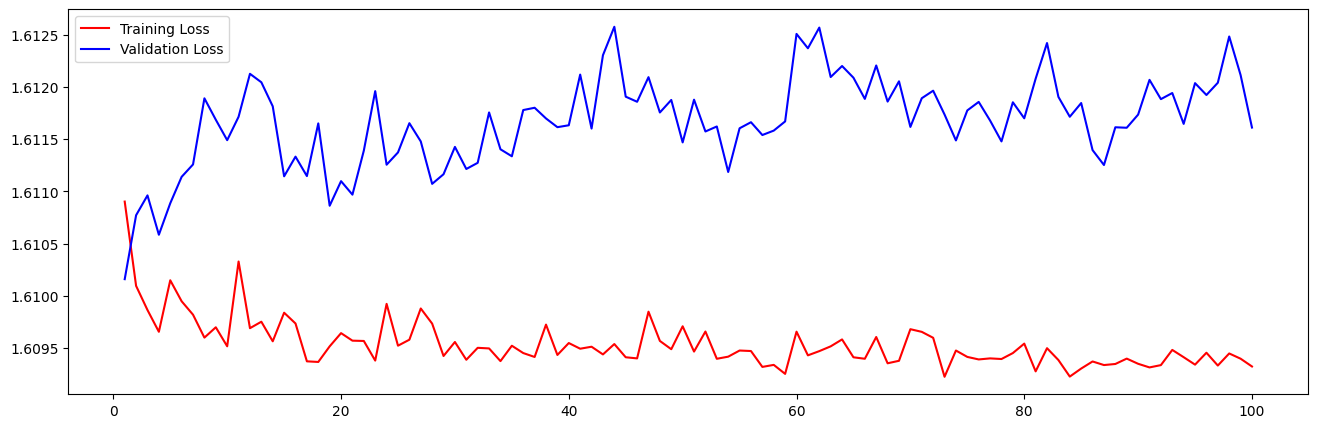

In [ ]:
plotLossChart(history_lstm)

### Observation:-
- This chart is for loss across epochs.
- Validation loss keeps on climbing up whereas Training loss keeps on climbing down.
- There seems to have huge difference between validation loss & training loss.

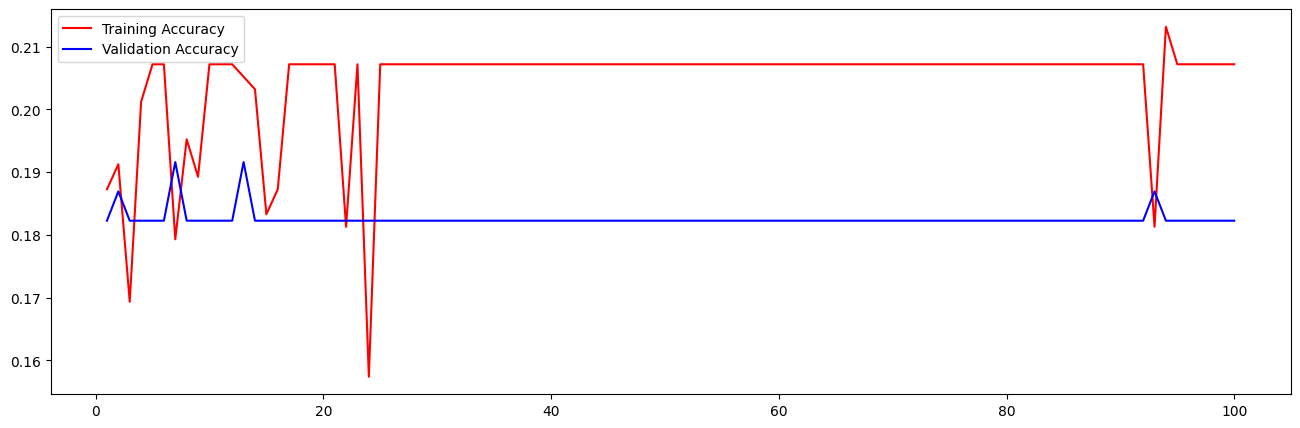

In [ ]:
plotAccuracyChart(history_lstm)

### Observation:-
- This chart is for accuracy across epochs.
- Validation and Training accuracy almost remains steady.
- There is difference between validation accuracy & training accuracy.

In [ ]:
accuracy_lstm = round(getAccuracy(model_lstm, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for LSTM is {}%'.format(accuracy_lstm))

7/7 - 0s - 56ms/step - accuracy: 0.1822 - loss: 1.6116
Test Accuracy for LSTM is 18.22%


### Observation:-
- Accuracy of LSTM model is 16.36%.

In [ ]:
predLstm = model_lstm.predict(X_testToken)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


In [ ]:
y_testToken_Roman = convertIntToCategoriesList(y_testToken_cat)
y_predLstm_Roman = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predLstm))

In [ ]:
con_matrix(y_testToken_Roman, y_predLstm_Roman)

Confusion Matrix


,I,II,III,IV,V,total count actual class
I,0,0,0,41,0,41
II,0,0,0,48,0,48
III,0,0,0,40,0,40
IV,0,0,0,39,0,39
V,0,0,0,46,0,46
total count predicted,0,0,0,214,0,214


### Observation:-
- The above Confusion Matrix has totals appended at the end. "total count actual class" - gives total count row-wise. "total count predicted" - gives total count column-wise.

- True Positives (TP)
    - For Level I   :  correctly classified level I   : 00 out of 42
    - For Level II  :  correctly classified level II  : 00 out of 46
    - For Level III :  correctly classified level III : 00 out of 48
    - For Level IV  :  correctly classified level IV  : 35 out of 35
    - For Level V   :  correctly classified level V   : 00 out of 43

In [ ]:
mat = classification_report(y_testToken_Roman, y_predLstm_Roman);
print(mat)

              precision    recall  f1-score   support

           I       0.00      0.00      0.00        41
          II       0.00      0.00      0.00        48
         III       0.00      0.00      0.00        40
          IV       0.18      1.00      0.31        39
           V       0.00      0.00      0.00        46

    accuracy                           0.18       214
   macro avg       0.04      0.20      0.06       214
weighted avg       0.03      0.18      0.06       214



### Bi-directional Long-Short Term Memory (Bi-LSTM)

In [ ]:
## Creating model

model_bilstm = Sequential()
model_bilstm.add(embeddingLayerTkn)
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.3))
model_bilstm.add(Dense(5, activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
history_bilstm = model_bilstm.fit(X_trainToken, np.array(y_trainToken_cat), batch_size=16, epochs=100, validation_data=(X_testToken, np.array(y_testToken_cat)), verbose=2)

Epoch 1/100
32/32 - 14s - 427ms/step - accuracy: 0.2351 - loss: 1.5988 - val_accuracy: 0.3458 - val_loss: 1.5604
Epoch 2/100
32/32 - 19s - 586ms/step - accuracy: 0.3307 - loss: 1.5156 - val_accuracy: 0.3551 - val_loss: 1.4849
Epoch 3/100
32/32 - 7s - 232ms/step - accuracy: 0.4024 - loss: 1.3879 - val_accuracy: 0.4252 - val_loss: 1.3952
Epoch 4/100
32/32 - 8s - 261ms/step - accuracy: 0.4124 - loss: 1.4268 - val_accuracy: 0.2664 - val_loss: 1.5088
Epoch 5/100
32/32 - 8s - 248ms/step - accuracy: 0.4382 - loss: 1.4018 - val_accuracy: 0.3879 - val_loss: 1.4046
Epoch 6/100
32/32 - 9s - 285ms/step - accuracy: 0.4602 - loss: 1.2628 - val_accuracy: 0.3598 - val_loss: 1.3909
Epoch 7/100
32/32 - 12s - 362ms/step - accuracy: 0.4741 - loss: 1.2151 - val_accuracy: 0.4626 - val_loss: 1.2439
Epoch 8/100
32/32 - 11s - 345ms/step - accuracy: 0.5339 - loss: 1.1058 - val_accuracy: 0.4907 - val_loss: 1.1537
Epoch 9/100
32/32 - 8s - 250ms/step - accuracy: 0.5578 - loss: 1.0613 - val_accuracy: 0.4626 - val_l

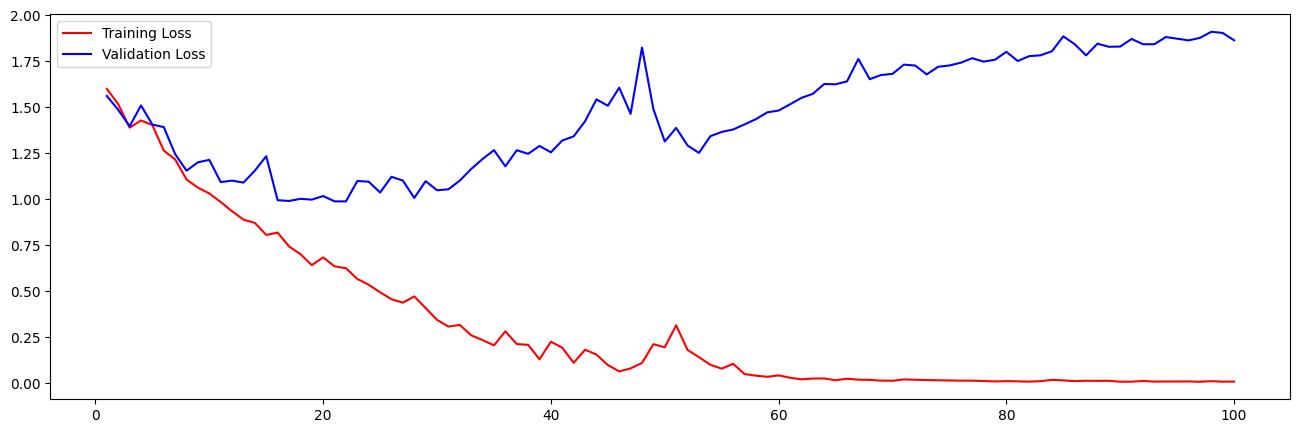

In [ ]:
plotLossChart(history_bilstm)

### Observation:-
- This chart is for loss across epochs.
- Validation loss is seen climbing up the graph whereas Training loss is seen climbing down the graph.
- There is huge difference between validation loss & training loss at later stage of epochs but at early stage the losses are at minimal.

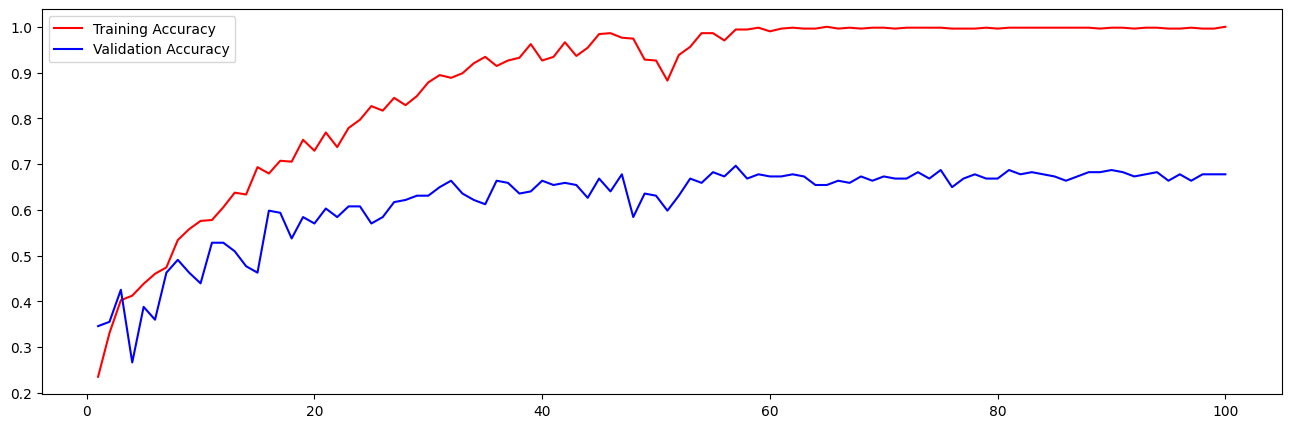

In [ ]:
plotAccuracyChart(history_bilstm)

### Observation:-
- This chart is for accuracy across epochs.
- Validation accuracies & Training accuracies are minimal at early stage but steadily validation accuracy falls & training accuracy climbs up.
- After 63 epochs the training accuracy & validation accuracy remains stable at there own level.
- There is some difference between validation accuracy & training accuracy at last stage of epoch. This could be because of overfitting.

In [ ]:
accuracy_bilstm = round(getAccuracy(model_bilstm, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for Bi-LSTM is {}%'.format(accuracy_bilstm))

7/7 - 0s - 70ms/step - accuracy: 0.6776 - loss: 1.8633
Test Accuracy for Bi-LSTM is 67.76%


### Observation:-
- Accuracy of Bi-LSTM model is 64.95%.

In [ ]:
predBilstm = model_bilstm.predict(X_testToken)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


In [ ]:
y_predBilstm_Roman = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predBilstm))

In [ ]:
con_matrix(y_testToken_Roman, y_predBilstm_Roman)

Confusion Matrix


,I,II,III,IV,V,total count actual class
I,36,3,1,1,0,41
II,0,27,8,11,2,48
III,2,8,23,6,1,40
IV,3,6,12,15,3,39
V,0,0,1,1,44,46
total count predicted,41,44,45,34,50,214


### Observation:-
- The above Confusion Matrix has totals appended at the end. "total count actual class" - gives total count row-wise. "total count predicted" - gives total count column-wise.

- True Positives (TP)
    - For Level I   :  correctly classified level I   : 37 out of 42
    - For Level II  :  correctly classified level II  : 31 out of 46
    - For Level III :  correctly classified level III : 20 out of 48
    - For Level IV  :  correctly classified level IV  : 13 out of 35
    - For Level V   :  correctly classified level V   : 38 out of 43

In [ ]:
mat = classification_report(y_testToken_Roman, y_predBilstm_Roman);
print(mat)

              precision    recall  f1-score   support

           I       0.88      0.88      0.88        41
          II       0.61      0.56      0.59        48
         III       0.51      0.57      0.54        40
          IV       0.44      0.38      0.41        39
           V       0.88      0.96      0.92        46

    accuracy                           0.68       214
   macro avg       0.66      0.67      0.67       214
weighted avg       0.67      0.68      0.67       214



## FNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the FNN model
model_fnn = Sequential()
model_fnn.add(Dense(128, activation='relu', input_shape=(X_trainToken.shape[1],)))
#model_fnn.add(Flatten(input_shape=(X_trainToken.shape[1], X_trainToken.shape[2])))  # Flatten input
model_fnn.add(Dense(128, activation='relu'))  # Fully connected layer with 128 neurons
model_fnn.add(Dropout(0.3))  # Dropout for regularization
model_fnn.add(Dense(64, activation='relu'))  # Fully connected layer with 64 neurons
model_fnn.add(Dropout(0.3))  # Dropout for regularization
model_fnn.add(Dense(5, activation='softmax'))  # Output layer for 5 classes

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_fnn.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Train the model
history_fnn = model_fnn.fit(
    X_trainToken,
    np.array(y_trainToken_cat),
    batch_size=16,
    epochs=100,
    validation_data=(X_testToken, np.array(y_testToken_cat)),
    verbose=2
)

Epoch 1/100
32/32 - 3s - 83ms/step - accuracy: 0.1853 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 2/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 3/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 4/100
32/32 - 0s - 5ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 5/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 6/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 7/100
32/32 - 0s - 9ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 8/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 9/100
32/32 - 0s - 4ms/step - accuracy: 0.2012 - loss: nan - val_accuracy: 0.1916 - val_loss: nan
Epoch 10/100
32/32 - 0s - 6ms/step - accuracy: 0.2012 - loss: n

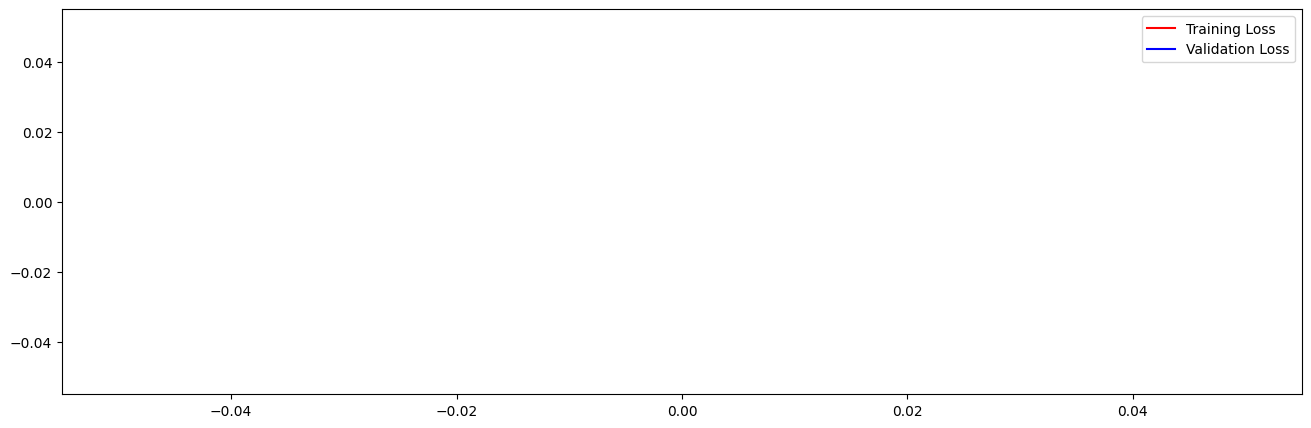

In [ ]:
# Plot Loss Chart
plotLossChart(history_fnn)

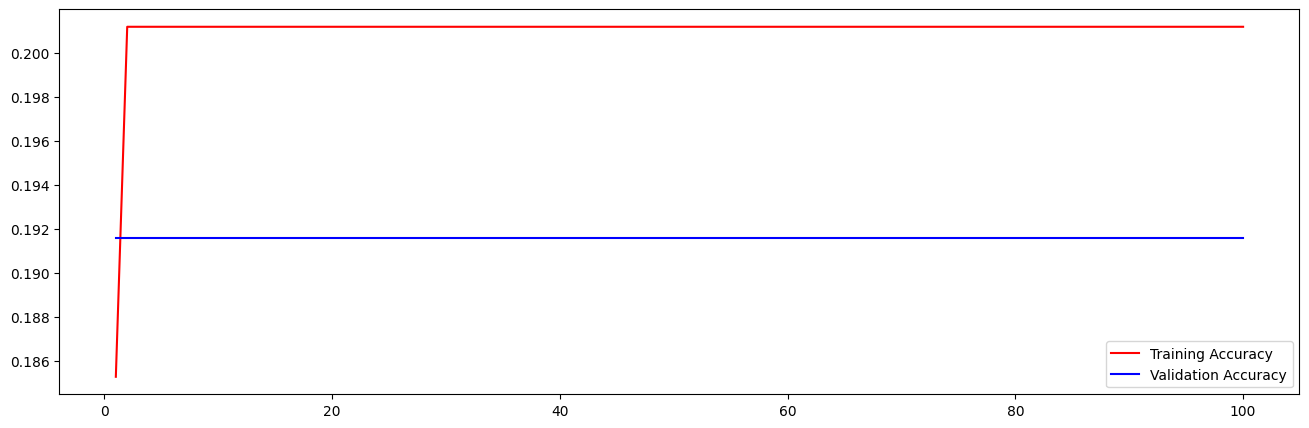

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_fnn)

In [ ]:
# Evaluate the model
accuracy_fnn = round(getAccuracy(model_fnn, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for FNN is {}%'.format(accuracy_fnn))

7/7 - 0s - 7ms/step - accuracy: 0.1916 - loss: nan
Test Accuracy for FNN is 19.16%


In [ ]:
# Predict using the model
predFnn = model_fnn.predict(X_testToken)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
# Convert predictions to categories
y_predFnn_Roman = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predFnn))

In [ ]:
# Display confusion matrix
con_matrix(y_testToken_Roman, y_predFnn_Roman)

Confusion Matrix


,I,II,III,IV,V,total count actual class
I,41,0,0,0,0,41
II,48,0,0,0,0,48
III,40,0,0,0,0,40
IV,39,0,0,0,0,39
V,46,0,0,0,0,46
total count predicted,214,0,0,0,0,214


In [ ]:
# Classification report
mat = classification_report(y_testToken_Roman, y_predFnn_Roman)
print(mat)

              precision    recall  f1-score   support

           I       0.19      1.00      0.32        41
          II       0.00      0.00      0.00        48
         III       0.00      0.00      0.00        40
          IV       0.00      0.00      0.00        39
           V       0.00      0.00      0.00        46

    accuracy                           0.19       214
   macro avg       0.04      0.20      0.06       214
weighted avg       0.04      0.19      0.06       214



## CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the CNN model
model_cnn = Sequential()
model_cnn.add(embeddingLayerTkn)  # Add the embedding layer
model_cnn.add(Conv1D(128, kernel_size=3, activation='relu'))  # 1D convolution layer
model_cnn.add(GlobalMaxPooling1D())  # Global max pooling
model_cnn.add(Dropout(0.3))  # Dropout for regularization
model_cnn.add(Dense(64, activation='relu'))  # Fully connected layer
model_cnn.add(Dropout(0.3))  # Dropout for regularization
model_cnn.add(Dense(5, activation='softmax'))  # Output layer for 5 classes

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
# Train the model
history_cnn = model_cnn.fit(
    X_trainToken,
    np.array(y_trainToken_cat),
    batch_size=16,
    epochs=100,
    validation_data=(X_testToken, np.array(y_testToken_cat)),
    verbose=2
)

Epoch 1/100
32/32 - 5s - 160ms/step - accuracy: 0.2151 - loss: 1.7570 - val_accuracy: 0.2897 - val_loss: 1.5826
Epoch 2/100
32/32 - 2s - 72ms/step - accuracy: 0.2789 - loss: 1.5643 - val_accuracy: 0.2944 - val_loss: 1.5348
Epoch 3/100
32/32 - 3s - 79ms/step - accuracy: 0.3506 - loss: 1.4792 - val_accuracy: 0.4252 - val_loss: 1.4101
Epoch 4/100
32/32 - 3s - 103ms/step - accuracy: 0.4223 - loss: 1.3287 - val_accuracy: 0.5093 - val_loss: 1.2224
Epoch 5/100
32/32 - 3s - 91ms/step - accuracy: 0.4920 - loss: 1.1768 - val_accuracy: 0.5421 - val_loss: 1.1494
Epoch 6/100
32/32 - 3s - 107ms/step - accuracy: 0.5737 - loss: 1.0204 - val_accuracy: 0.5748 - val_loss: 1.0344
Epoch 7/100
32/32 - 2s - 52ms/step - accuracy: 0.6016 - loss: 0.9221 - val_accuracy: 0.6121 - val_loss: 0.9097
Epoch 8/100
32/32 - 3s - 92ms/step - accuracy: 0.6813 - loss: 0.7933 - val_accuracy: 0.6916 - val_loss: 0.8862
Epoch 9/100
32/32 - 3s - 84ms/step - accuracy: 0.7052 - loss: 0.7079 - val_accuracy: 0.6822 - val_loss: 0.833

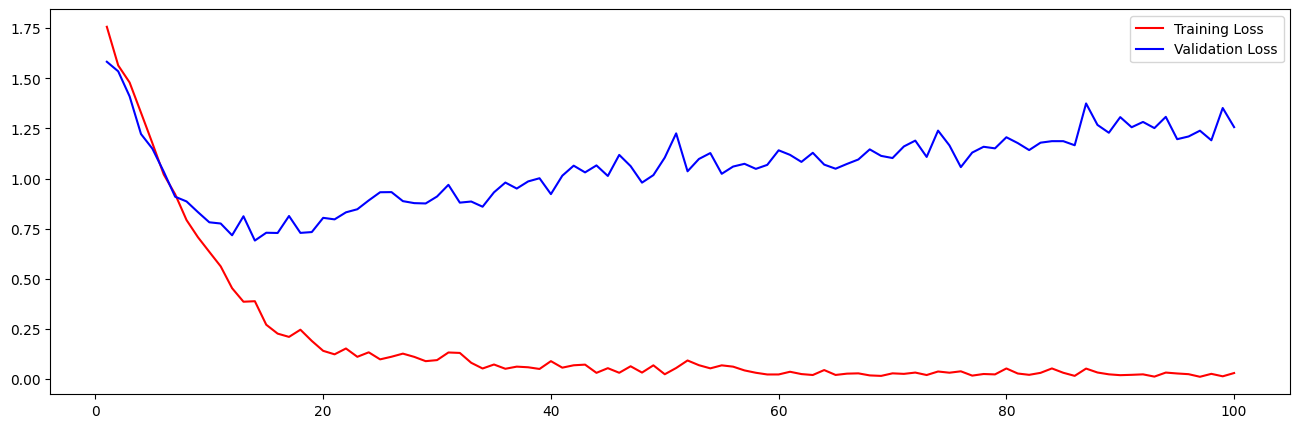

In [ ]:
# Plot Loss Chart
plotLossChart(history_cnn)

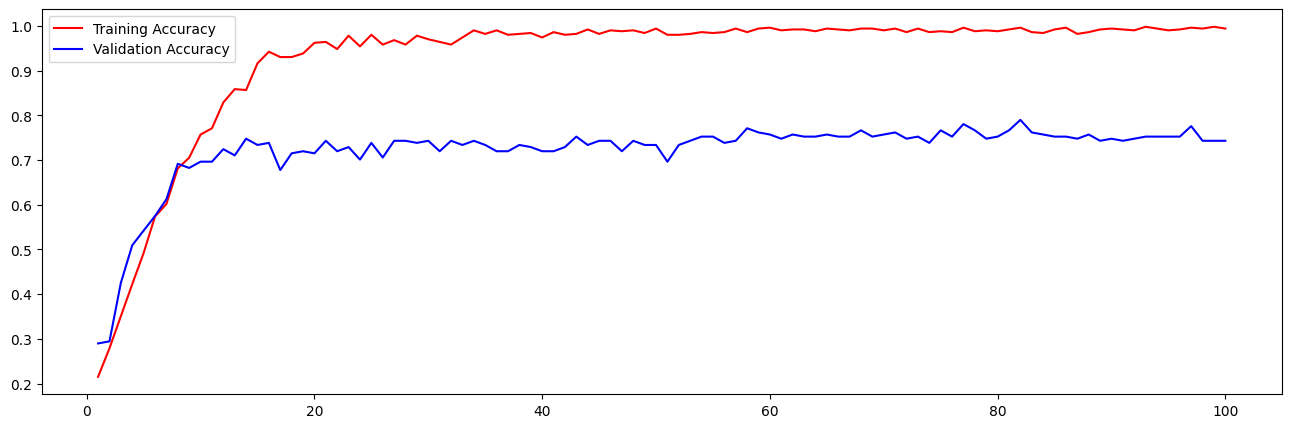

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_cnn)

In [ ]:
# Evaluate the model
accuracy_cnn = round(getAccuracy(model_cnn, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for CNN is {}%'.format(accuracy_cnn))

7/7 - 0s - 24ms/step - accuracy: 0.7430 - loss: 1.2567
Test Accuracy for CNN is 74.3%


In [ ]:
# Predict using the model
predCnn = model_cnn.predict(X_testToken)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
# Convert predictions to categories
y_predCnn_Roman = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predCnn))

In [ ]:
# Display confusion matrix
con_matrix(y_testToken_Roman, y_predCnn_Roman)

Confusion Matrix


,I,II,III,IV,V,total count actual class
I,38,2,0,1,0,41
II,0,33,8,5,2,48
III,1,5,28,6,0,40
IV,0,9,13,15,2,39
V,0,0,0,1,45,46
total count predicted,39,49,49,28,49,214


In [ ]:
# Classification report
mat = classification_report(y_testToken_Roman, y_predCnn_Roman)
print(mat)

              precision    recall  f1-score   support

           I       0.97      0.93      0.95        41
          II       0.67      0.69      0.68        48
         III       0.57      0.70      0.63        40
          IV       0.54      0.38      0.45        39
           V       0.92      0.98      0.95        46

    accuracy                           0.74       214
   macro avg       0.73      0.74      0.73       214
weighted avg       0.74      0.74      0.74       214



## RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, Embedding
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the RNN model
model_rnn = Sequential()
model_rnn.add(embeddingLayerTkn)  # Embedding layer
model_rnn.add(SimpleRNN(64))  # Simple RNN layer with 64 units
model_rnn.add(Dropout(0.3))  # Dropout for regularization
model_rnn.add(Dense(5, activation='softmax'))  # Output layer for 5 classes

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
# Train the model
history_rnn = model_rnn.fit(
    X_trainToken,
    np.array(y_trainToken_cat),
    batch_size=16,
    epochs=100,
    validation_data=(X_testToken, np.array(y_testToken_cat)),
    verbose=2
)

Epoch 1/100
32/32 - 6s - 185ms/step - accuracy: 0.1952 - loss: 1.6730 - val_accuracy: 0.1822 - val_loss: 1.6374
Epoch 2/100
32/32 - 4s - 129ms/step - accuracy: 0.2032 - loss: 1.6869 - val_accuracy: 0.1822 - val_loss: 1.6428
Epoch 3/100
32/32 - 9s - 276ms/step - accuracy: 0.2151 - loss: 1.6310 - val_accuracy: 0.1822 - val_loss: 1.6360
Epoch 4/100
32/32 - 7s - 214ms/step - accuracy: 0.1952 - loss: 1.6696 - val_accuracy: 0.1776 - val_loss: 1.6904
Epoch 5/100
32/32 - 7s - 215ms/step - accuracy: 0.2191 - loss: 1.7434 - val_accuracy: 0.2243 - val_loss: 1.6317
Epoch 6/100
32/32 - 8s - 235ms/step - accuracy: 0.2191 - loss: 1.7640 - val_accuracy: 0.2196 - val_loss: 1.6657
Epoch 7/100
32/32 - 5s - 156ms/step - accuracy: 0.2191 - loss: 1.7248 - val_accuracy: 0.1963 - val_loss: 1.6723
Epoch 8/100
32/32 - 9s - 282ms/step - accuracy: 0.2131 - loss: 1.7262 - val_accuracy: 0.2664 - val_loss: 1.6577
Epoch 9/100
32/32 - 5s - 156ms/step - accuracy: 0.2151 - loss: 1.6836 - val_accuracy: 0.2290 - val_loss:

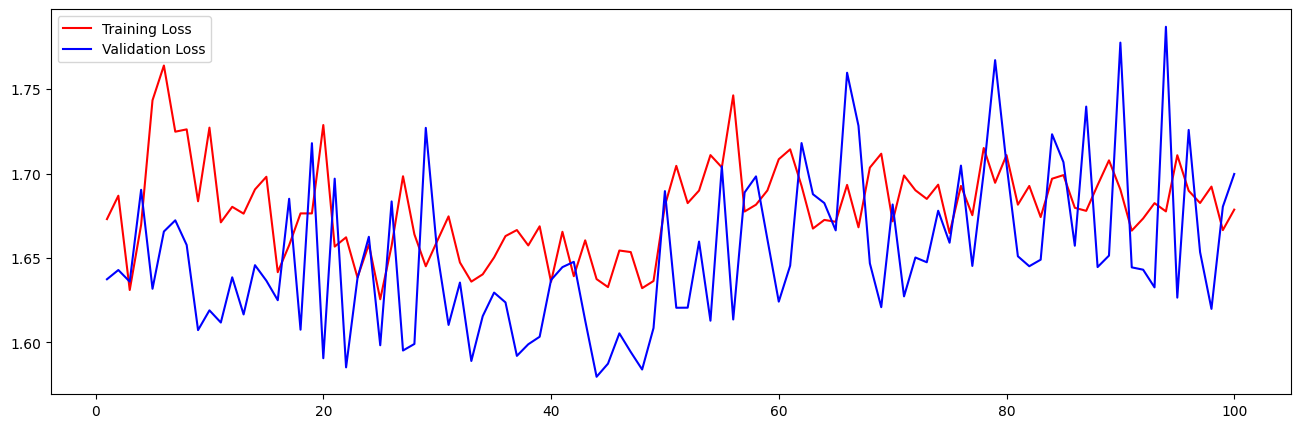

In [ ]:
# Plot Loss Chart
plotLossChart(history_rnn)

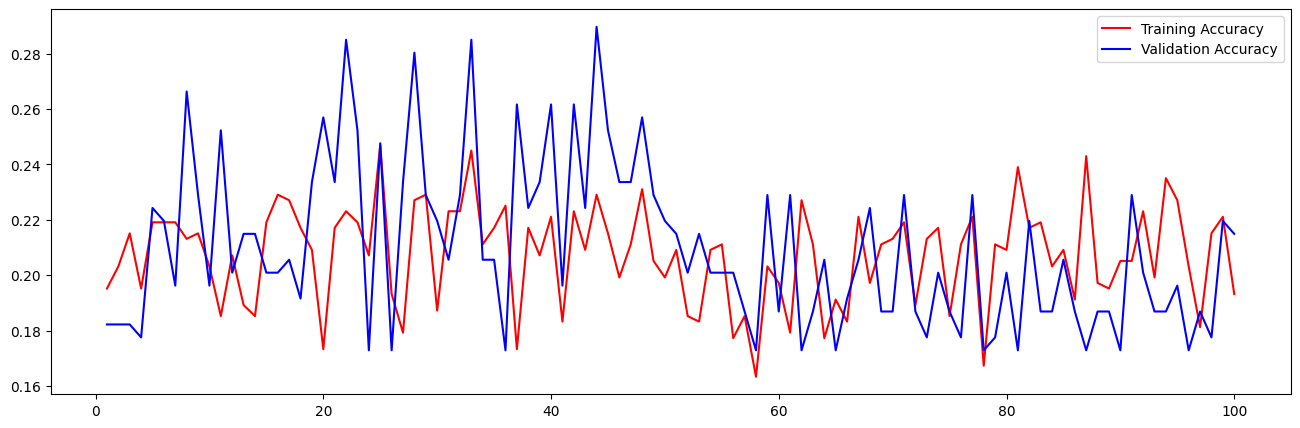

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_rnn)

In [ ]:
# Evaluate the model
accuracy_rnn = round(getAccuracy(model_rnn, X_testToken, np.array(y_testToken_cat)), 2)
print('Test Accuracy for RNN is {}%'.format(accuracy_rnn))

7/7 - 0s - 21ms/step - accuracy: 0.2150 - loss: 1.6998
Test Accuracy for RNN is 21.5%


In [ ]:
# Predict using the model
predRnn = model_rnn.predict(X_testToken)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [ ]:
# Convert predictions to categories
y_predRnn_Roman = convertIntToCategoriesList(convertPredictProbaToActualPrediction(predRnn))

In [ ]:
# Display confusion matrix
con_matrix(y_testToken_Roman, y_predRnn_Roman)

Confusion Matrix


,I,II,III,IV,V,total count actual class
I,0,35,0,6,0,41
II,0,41,0,7,0,48
III,0,37,0,3,0,40
IV,0,34,0,5,0,39
V,0,43,0,3,0,46
total count predicted,0,190,0,24,0,214


In [ ]:
# Classification report
mat = classification_report(y_testToken_Roman, y_predRnn_Roman)
print(mat)

              precision    recall  f1-score   support

           I       0.00      0.00      0.00        41
          II       0.22      0.85      0.34        48
         III       0.00      0.00      0.00        40
          IV       0.21      0.13      0.16        39
           V       0.00      0.00      0.00        46

    accuracy                           0.21       214
   macro avg       0.08      0.20      0.10       214
weighted avg       0.09      0.21      0.11       214



## **Method 2: Data Preprocessing +Back Translation + Augmentation & SMOTE + Sentence Transformer + Model Evaluation**

* Target variable: Potential accident level with SMOTE
* Accident and Potential accident augmentation: Probability sampling
* Description augmentation: Synonym
* Encoding: Custom mapping


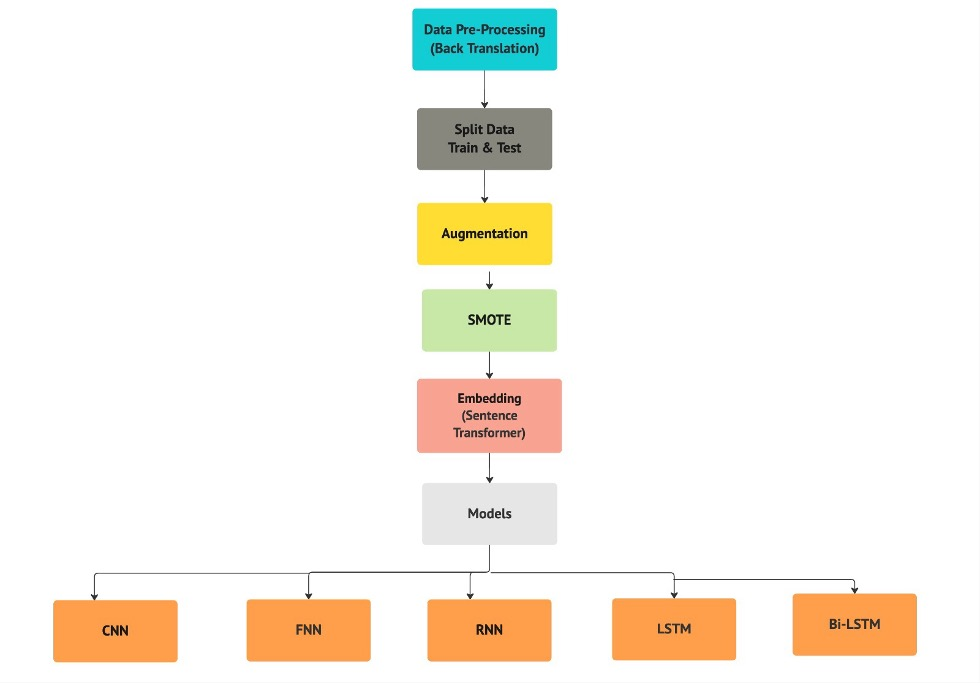

# Importing Required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing all the necessary libraries
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# import unicodedata
# import unidecode
# from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint

#from google_trans_new import google_translator

#from ann_visualizer.visualize import ann_viz;
# from keras.utils.vis_utils import plot_model


In [ ]:
# Load the refined CSV file after EDA
df = pd.read_csv("/content/drive/MyDrive/datacleansed.csv")

In [ ]:
df.head()

,index,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=025fffa1a9cf5ac85b6c3771dd4244d817bb19a958804a06e5e5e73fc7b87f25
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

# Data Pre-Processing

Do Changes According to the File Location

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=8ac2ad225b2b70d88a97c11491e4feb5fa05065742d953b7cac3904422006bc3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
# Importing library for data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random


# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming


from nltk.stem import WordNetLemmatizer

# to remove common stop words
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# to perform stemming
from nltk.stem.porter import PorterStemmer

from nltk.tokenize import word_tokenize
from tqdm import tqdm
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# To import Word2Vec
from gensim.models import Word2Vec

# To tune the model
from sklearn.model_selection import GridSearchCV

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# To compute metrics to evaluate the model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset_cleaned = df.copy()


In [ ]:
dataset_cleaned.head()

,index,Country,Location,Industry_Sector,Accident_Level,Potential_Accident_Level,Gender,Employee_Type,Critical_Risk,Description
0,0,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
from langdetect import detect
import re

def detect_foreign_words(description):
    """
    Detect if the description contains foreign words or is written in a non-English language.

    Args:
        description (str): The text to analyze.

    Returns:
        dict: A dictionary containing:
            - 'detected_language' (str): The detected language of the text.
            - 'non_ascii_words' (list): List of words containing non-ASCII characters.
    """
    # Tokenize the description into words
    tokens = re.findall(r'\b\w+\b', description)

    # Detect the dominant language of the text
    try:
        detected_language = detect(description)
    except Exception as e:
        detected_language = 'unknown'  # Handle edge cases where detection fails

    # Check for words with non-ASCII characters
    non_ascii_words = [word for word in tokens if not all(ord(char) < 128 for char in word)]

    return {
        'detected_language': detected_language,
        'non_ascii_words': non_ascii_words
    }


In [ ]:
%%time

# Create a new DataFrame with Description and Foreign Words
foreign_words_df = df[['Description']].copy()

# Apply the detect_foreign_words function to populate 'Foreign Words' and extract non-ASCII words
foreign_words_df['Foreign Words'] = foreign_words_df['Description'].apply(
    lambda desc: detect_foreign_words(desc)['non_ascii_words']
)

# Filter rows where the list of foreign words is not empty
foreign_words_df = foreign_words_df[foreign_words_df['Foreign Words'].apply(len) > 0]

# Display the resulting DataFrame and summary
print(f"Number of rows with foreign words or non-English sentences: {len(foreign_words_df)}")


Number of rows with foreign words or non-English sentences: 27
CPU times: user 1.36 s, sys: 13.3 ms, total: 1.37 s
Wall time: 1.37 s


In [ ]:
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
%%time
from deep_translator import GoogleTranslator

# Function to translate text to Brazilian Portuguese and then back to English
def translate_to_brazilian_and_back(text):
    """
    Translates text to Brazilian Portuguese and back to English using GoogleTranslator.

    Args:
        text (str): The text to translate.

    Returns:
        str: The text after being translated to Brazilian Portuguese and back to English.
             Returns an error message if translation fails.
    """
    try:
        # Translate to Brazilian Portuguese
        to_brazilian = GoogleTranslator(source='auto', target='pt').translate(text)
        # Translate back to English
        back_to_english = GoogleTranslator(source='pt', target='en').translate(to_brazilian)
        return back_to_english
    except Exception as e:
        return f"Translation Error: {e}"


CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 15 µs


In [ ]:
%%time
# Select 10 random rows from the 'Description' column
sample_description = df['Description'].sample(10, random_state=42)

# Apply the double translation function
sample_translation = sample_description.apply(translate_to_brazilian_and_back)

# Create a DataFrame to compare the original and double-translated text
comparison_df = pd.DataFrame({
    'Original Description': sample_description.values,
    'Double_Translated_Description': sample_translation.values
})

# Display the comparison DataFrame
comparison_df


CPU times: user 148 ms, sys: 9.38 ms, total: 158 ms
Wall time: 1.33 s


,Original Description,Double_Translated_Description
0,During torch cutting activity of the new evapo...,During the torch cutting activity on the new e...
1,The worker Yaranga while working with barretil...,The worker Yaranga while working with barretil...
2,In circumstances that a dump truck laden with ...,In circumstances where a dump truck loaded wit...
3,During the execution of the service of opening...,While performing the work of opening up paths ...
4,The employee reports that he performed his rou...,The employee reports that he was carrying out ...
5,Employee reports that when handling the air co...,Employee reports that when handling the air co...
6,"In circumstance, the AHK-903 license plate (Em...","In the circumstances, the vehicle with license..."
7,"Being approximately 5:00 a.m. approximately, w...","At approximately 5:00 in the morning, when lif..."
8,The ground team coordinated by Prospector with...,The ground team coordinated by the Prospector ...
9,Employee reports that by removing the zinc she...,Employee reports that when removing the zinc p...


In [ ]:
%%time
# Apply back-translation to the Description column
df['Standardized Description'] = df['Description'].apply(translate_to_brazilian_and_back)

# Display the first few rows of the Description and Standardized Description columns
df[['Description', 'Standardized Description']].head()

CPU times: user 6.54 s, sys: 430 ms, total: 6.97 s
Wall time: 51.4 s


,Description,Standardized Description
0,While removing the drill rod of the Jumbo 08 f...,When removing the drilling rod from the Jumbo ...
1,During the activation of a sodium sulphide pum...,During the activation of a sodium sulfide pump...
2,In the sub-station MILPO located at level +170...,"At the MILPO substation located at level +170,..."
3,Being 9:45 am. approximately in the Nv. 1880 C...,At approximately 9:45 in the morning on Lv. 18...
4,Approximately at 11:45 a.m. in circumstances t...,"At approximately 11:45 a.m., in circumstances ..."


In [ ]:
import spacy
import re

# retaining meaningful abbreviation like "SO2" and numerical fractions like "3/8".
#Using Spacy's lemmatizer and standard list for consistency and better context handling.
#retaining domain-specific terms

# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# Updated text preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Retain domain-specific abbreviations and remove unnecessary characters
    # Keep alphanumeric characters, spaces, and domain-specific symbols like "/"
    text = re.sub(r'[^a-zA-Z0-9\s\/\.\-]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize and process using SpaCy
    doc = nlp(text)

    # Lemmatize and remove stopwords, retaining specific terms
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop and (token.is_alpha or token.text in ["so2", "3/8", "drill"])
    ]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
# Apply the function to the 'Description' column
df['Translated_Description'] = df['Standardized Description'].apply(preprocess_text)

In [ ]:
# Display the first few rows to verify the preprocessing
display(df[['Description', 'Translated_Description', 'Standardized Description']].head())

,Description,Translated_Description,Standardized Description
0,While removing the drill rod of the Jumbo 08 f...,remove drilling rod jumbo maintenance supervis...,When removing the drilling rod from the Jumbo ...
1,During the activation of a sodium sulphide pum...,activation sodium sulfide pump piping disconne...,During the activation of a sodium sulfide pump...
2,In the sub-station MILPO located at level +170...,milpo substation locate level employee carry e...,"At the MILPO substation located at level +170,..."
3,Being 9:45 am. approximately in the Nv. 1880 C...,approximately morning lv personnel begin task ...,At approximately 9:45 in the morning on Lv. 18...
4,Approximately at 11:45 a.m. in circumstances t...,approximately circumstance mechanic anthony gr...,"At approximately 11:45 a.m., in circumstances ..."


In [ ]:
df.to_csv('finalized_descriptions.csv', index=False)


In [ ]:
# from langdetect import detect
# from googletrans import Translator

# translator = Translator()

# # Function to detect language
# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return "unknown"

# # Function to translate non-English text to English
# def translate_to_english(text):
#     try:
#         lang = detect_language(text)
#         if lang != 'en':
#             return translator.translate(text, src=lang, dest='en').text
#         return text
#     except:
#         return text

# # Apply language detection and translation
# df['Language'] = df['Cleaned_Description'].apply(detect_language)
# df['Translated_Description'] = df['Cleaned_Description'].apply(translate_to_english)

# # Display a sample
# df[['Cleaned_Description', 'Language', 'Translated_Description']].head()


,Cleaned_Description,Language,Translated_Description
0,remove drilling rod jumbo maintenance supervis...,en,remove drilling rod jumbo maintenance supervis...
1,activation sodium sulfide pump piping disconne...,en,activation sodium sulfide pump piping disconne...
2,milpo substation locate level employee carry e...,en,milpo substation locate level employee carry e...
3,approximately morning lv personnel begin task ...,en,approximately morning lv personnel begin task ...
4,approximately circumstance mechanic anthony gr...,en,approximately circumstance mechanic anthony gr...


In [ ]:
df.columns

Index(['index', 'Country', 'Location', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Gender', 'Employee_Type', 'Critical_Risk',
       'Description', 'Standardized Description', 'Translated_Description'],
      dtype='object')

In [ ]:
dataset_final_description = df.drop(columns=['Country', 'Location', 'Description', 'Standardized Description', 'index'])

In [ ]:
dataset_final_description.columns

Index(['Industry_Sector', 'Accident_Level', 'Potential_Accident_Level',
       'Gender', 'Employee_Type', 'Critical_Risk', 'Translated_Description'],
      dtype='object')

In [ ]:
dataset_final_description = dataset_final_description.drop(columns=['Industry_Sector','Gender', 'Employee_Type','Critical_Risk'])

In [ ]:
dataset_final_description

,Accident_Level,Potential_Accident_Level,Translated_Description
0,I,IV,remove drilling rod jumbo maintenance supervis...
1,I,IV,activation sodium sulfide pump piping disconne...
2,I,III,milpo substation locate level employee carry e...
3,I,I,approximately morning lv personnel begin task ...
4,IV,IV,approximately circumstance mechanic anthony gr...
...,...,...,...
406,I,II,employee move infrastructure office jlio restr...
407,I,III,approximately morning lift kelly hq frame pull...
408,I,II,environmental monitoring activity area employe...
409,I,II,employee carry activity peel cathode pull cath...


In [ ]:
dataset_final_description

,Accident_Level,Potential_Accident_Level,Translated_Description
0,I,IV,remove drilling rod jumbo maintenance supervis...
1,I,IV,activation sodium sulfide pump piping disconne...
2,I,III,milpo substation locate level employee carry e...
3,I,I,approximately morning lv personnel begin task ...
4,IV,IV,approximately circumstance mechanic anthony gr...
...,...,...,...
406,I,II,employee move infrastructure office jlio restr...
407,I,III,approximately morning lift kelly hq frame pull...
408,I,II,environmental monitoring activity area employe...
409,I,II,employee carry activity peel cathode pull cath...


In [ ]:
# Calculate the correlation between Accident Level and Potential Accident Level

from scipy.stats import spearmanr

# Custom mapping for ordinal encoding
#custom_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4,'VI': 5}
custom_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}

# Apply custom mapping to encode ordinal variables
dataset_final_description['Accident_Level_Encoded'] = dataset_final_description['Accident_Level'].map(custom_mapping)
dataset_final_description['Potential_Accident_Level_Encoded'] = dataset_final_description['Potential_Accident_Level'].map(custom_mapping)

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(dataset_final_description['Accident_Level_Encoded'], dataset_final_description['Potential_Accident_Level_Encoded'])

# Display results
print("Spearman Correlation:", correlation)
print("P-Value:", p_value)

# Display the encoded data with new description
dataset_final_description.to_csv('/content/drive/MyDrive/NLP1-G4/dataset_final_description.csv', index=False)

Spearman Correlation: 0.5012678913790903
P-Value: 1.556750974659938e-27


In [ ]:
#cleaned description
dataset_cleaned_original = pd.read_csv('/content/drive/MyDrive/NLP1-G4/dataset_final_description.csv')

In [ ]:
dataset_cleaned_original.columns

Index(['Accident_Level', 'Potential_Accident_Level', 'Translated_Description',
       'Accident_Level_Encoded', 'Potential_Accident_Level_Encoded'],
      dtype='object')

In [ ]:
dataset_cleaned_original

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,remove drilling rod jumbo maintenance supervis...,0,3
1,I,IV,activation sodium sulfide pump piping disconne...,0,3
2,I,III,milpo substation locate level employee carry e...,0,2
3,I,I,approximately morning lv personnel begin task ...,0,0
4,IV,IV,approximately circumstance mechanic anthony gr...,3,3
...,...,...,...,...,...
406,I,II,employee move infrastructure office jlio restr...,0,1
407,I,III,approximately morning lift kelly hq frame pull...,0,2
408,I,II,environmental monitoring activity area employe...,0,1
409,I,II,employee carry activity peel cathode pull cath...,0,1


In [ ]:
dataset_cleaned_original['Accident_Level_Encoded'].value_counts()

,count
Accident_Level_Encoded,
0,303
1,39
2,31
3,30
4,8


In [ ]:
dataset_cleaned_original['Potential_Accident_Level_Encoded'].value_counts()

,count
Potential_Accident_Level_Encoded,
3,138
2,106
1,95
0,43
4,29


In [ ]:
dataset_cleaned_original.head()

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,remove drilling rod jumbo maintenance supervis...,0,3
1,I,IV,activation sodium sulfide pump piping disconne...,0,3
2,I,III,milpo substation locate level employee carry e...,0,2
3,I,I,approximately morning lv personnel begin task ...,0,0
4,IV,IV,approximately circumstance mechanic anthony gr...,3,3


In [ ]:
dataset_cleaned_original.columns

Index(['Accident_Level', 'Potential_Accident_Level', 'Translated_Description',
       'Accident_Level_Encoded', 'Potential_Accident_Level_Encoded'],
      dtype='object')

In [ ]:
dataset_cleaned_original

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,remove drilling rod jumbo maintenance supervis...,0,3
1,I,IV,activation sodium sulfide pump piping disconne...,0,3
2,I,III,milpo substation locate level employee carry e...,0,2
3,I,I,approximately morning lv personnel begin task ...,0,0
4,IV,IV,approximately circumstance mechanic anthony gr...,3,3
...,...,...,...,...,...
406,I,II,employee move infrastructure office jlio restr...,0,1
407,I,III,approximately morning lift kelly hq frame pull...,0,2
408,I,II,environmental monitoring activity area employe...,0,1
409,I,II,employee carry activity peel cathode pull cath...,0,1


In [ ]:
# Display the encoded data with new description
dataset_final_description.to_csv('/content/drive/MyDrive/NLP1-G4/final.csv', index=False)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NLP1-G4/final.csv')

In [ ]:
df.head()

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,remove drilling rod jumbo maintenance supervis...,0,3
1,I,IV,activation sodium sulfide pump piping disconne...,0,3
2,I,III,milpo substation locate level employee carry e...,0,2
3,I,I,approximately morning lv personnel begin task ...,0,0
4,IV,IV,approximately circumstance mechanic anthony gr...,3,3


In [ ]:
df = df.drop(columns=['Accident_Level','Potential_Accident_Level','Translated_Description'])

In [ ]:
df.columns

Index(['Accident_Level_Encoded', 'Potential_Accident_Level_Encoded'], dtype='object')

In [ ]:
df

,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,0,3
1,0,3
2,0,2
3,0,0
4,3,3
...,...,...
406,0,1
407,0,2
408,0,1
409,0,1


In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


# Load the dataset
df = df.copy()


In [ ]:
df

,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,0,3
1,0,3
2,0,2
3,0,0
4,3,3
...,...,...
406,0,1
407,0,2
408,0,1
409,0,1


In [ ]:
# Define target and features
X = dataset_cleaned_original.drop(['Potential_Accident_Level_Encoded'], axis=1)
y = dataset_cleaned_original['Potential_Accident_Level_Encoded']

# Splitting the data into train, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

# Checking the sizes of each split
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

train_size, val_size, test_size

(287, 62, 62)

In [ ]:
y.value_counts()

,count
Potential_Accident_Level_Encoded,
3,138
2,106
1,95
0,43
4,29


In [ ]:
dataset_cleaned_original['Accident_Level_Encoded'].value_counts()

,count
Accident_Level_Encoded,
0,303
1,39
2,31
3,30
4,8


In [ ]:
train_dataset = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
val_dataset = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
test_dataset = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [ ]:
train_dataset.shape

(287, 5)

# Data Augmentation

In [ ]:
# Data Augmentation for Potential Accident Level and Accident Level
def augment_labels(df, column, multiplier):
    augmented_df = pd.DataFrame()
    for _ in range(multiplier):
        new_df = df.copy()
        new_df[column] = new_df[column].apply(lambda x: x + np.random.choice([-1, 0, 1]))
        new_df[column] = new_df[column].apply(lambda x: max(1, min(x, 5)))
        augmented_df = pd.concat([augmented_df, new_df])
    return augmented_df



In [ ]:
augmented_df_train = augment_labels(train_dataset, 'Potential_Accident_Level_Encoded', 2)
augmented_df_train = augment_labels(augmented_df_train, 'Accident_Level_Encoded', 2)


In [ ]:

augmented_df_val = augment_labels(val_dataset, 'Potential_Accident_Level_Encoded', 2)
augmented_df_val = augment_labels(augmented_df_val, 'Accident_Level_Encoded', 2)

In [ ]:
augmented_df_train

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,time employee inspect conveyor belt rear pulle...,1,4
1,I,IV,circumstance dump truck load ore enter curve r...,1,3
2,I,III,mechanic perform maintenance motor mount dump ...,1,2
3,II,IV,align right support tower release tension appl...,1,3
4,I,IV,pre use inspection jumbo equipment checklist e...,1,4
...,...,...,...,...,...
282,I,III,employee walk grs area slip sprain left knee,1,3
283,I,III,unloading operation roasted bag necessary uncl...,1,2
284,I,I,region povoado vista martinpole ce employee fb...,1,1
285,II,V,mixer incimmet move south positive ramp surfac...,1,4


In [ ]:
augmented_df_val

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,employee report climb stair surgical center ho...,1,4
1,I,III,accumulation waelz conveyor belt trailer filte...,1,1
2,I,II,industrial cleaning worker cristian clean gutt...,1,1
3,I,III,open access ladder passenger transport truck e...,1,1
4,I,IV,heavy equipment operator climb equipment check...,1,3
...,...,...,...,...,...
57,I,II,employee report carry welding activity hit eye...,1,1
58,I,II,operator samuel open container subsequent load...,1,2
59,I,III,approximately pm supervise fixing pom line roy...,1,2
60,I,II,employee misalign nut left ramp scraper lane s...,1,2


In [ ]:
augmented_df_train['Accident_Level_Encoded'].value_counts()

,count
Accident_Level_Encoded,
1,948
2,94
3,65
4,32
5,9


In [ ]:
augmented_df_val['Potential_Accident_Level_Encoded'].value_counts()

,count
Potential_Accident_Level_Encoded,
1,82
3,70
2,66
4,24
5,6


Custom mapping to ensure consistency of encoding of ordinal variables

In [ ]:
custom_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

# Apply custom mapping to encode ordinal variables
augmented_df_train['Accident_Level_Encoded'] = augmented_df_train['Accident_Level_Encoded'].map(custom_mapping)
augmented_df_train['Potential_Accident_Level_Encoded'] = augmented_df_train['Potential_Accident_Level_Encoded'].map(custom_mapping)

# Apply custom mapping to encode ordinal variables
augmented_df_val['Accident_Level_Encoded'] = augmented_df_val['Accident_Level_Encoded'].map(custom_mapping)
augmented_df_val['Potential_Accident_Level_Encoded'] = augmented_df_val['Potential_Accident_Level_Encoded'].map(custom_mapping)

In [ ]:
augmented_df_val['Potential_Accident_Level_Encoded'].value_counts()

,count
Potential_Accident_Level_Encoded,
0,82
2,70
1,66
3,24
4,6


In [ ]:
augmented_df_train.columns

Index(['Accident_Level', 'Potential_Accident_Level', 'Translated_Description',
       'Accident_Level_Encoded', 'Potential_Accident_Level_Encoded'],
      dtype='object')

In [ ]:
augmented_df_train['Translated_Description'].nunique()

287

# Data Synthesis

In [ ]:
# Data Synthesis for Description
def synthesize_text(df, column):
    synthesized_df = pd.DataFrame()
    for _ in range(2):  # Synthesize 2 times the original data
        new_df = df.copy()
        new_df[column] = new_df[column].apply(description_augmentation)
        synthesized_df = pd.concat([synthesized_df, new_df])
    return synthesized_df


def description_augmentation(description):
    words = description.split()
    words_augmented = []
    for word in words:
        word_synonyms = wordnet.synsets(word)
        if word_synonyms and random.random() < 0.2:
            word_synonym = word_synonyms[0].lemmas()[0].name().replace('_', ' ')
            words_augmented.append(word_synonym)
        else:
            words_augmented.append(word)
    return ' '.join(words_augmented)




In [ ]:
synthesized_df_train = synthesize_text(train_dataset, 'Translated_Description')

In [ ]:
synthesized_df_train.shape

(574, 5)

In [ ]:
synthesized_df_train['Accident_Level_Encoded'].value_counts()

,count
Accident_Level_Encoded,
0,432
1,50
3,42
2,40
4,10


In [ ]:
synthesized_df_val = synthesize_text(val_dataset, 'Translated_Description')

In [ ]:
# Combine Augmented and Synthesized Data
combined_df_train_dataset = pd.concat([augmented_df_train, synthesized_df_train])

In [ ]:
# Combine Augmented and Synthesized Data
combined_df_val_dataset = pd.concat([augmented_df_val, synthesized_df_val])

In [ ]:
combined_df_train_dataset.head()

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,time employee inspect conveyor belt rear pulle...,0,3
1,I,IV,circumstance dump truck load ore enter curve r...,0,2
2,I,III,mechanic perform maintenance motor mount dump ...,0,1
3,II,IV,align right support tower release tension appl...,0,2
4,I,IV,pre use inspection jumbo equipment checklist e...,0,3


In [ ]:
combined_df_train_dataset.shape

(1722, 5)

In [ ]:
combined_df_train_dataset['Potential_Accident_Level_Encoded'].value_counts()

,count
Potential_Accident_Level_Encoded,
0,458
1,456
2,376
3,364
4,68


In [ ]:
combined_df_train_dataset['Accident_Level_Encoded'].value_counts()

,count
Accident_Level_Encoded,
0,1380
1,144
2,105
3,74
4,19


In [ ]:
combined_df_val_dataset.head()

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,employee report climb stair surgical center ho...,0,3
1,I,III,accumulation waelz conveyor belt trailer filte...,0,0
2,I,II,industrial cleaning worker cristian clean gutt...,0,0
3,I,III,open access ladder passenger transport truck e...,0,0
4,I,IV,heavy equipment operator climb equipment check...,0,2


In [ ]:
combined_df_val_dataset.shape

(372, 5)

In [ ]:
# Display the encoded data with new description
combined_df_train_dataset.to_csv('/content/drive/MyDrive/NLP1-G4/combined_df_train_dataset.csv', index=False)

# Display the encoded data with new description
combined_df_val_dataset.to_csv('/content/drive/MyDrive/NLP1-G4/combined_df_val_dataset.csv', index=False)

In [ ]:
# Display the encoded data with new description
train_dataset=pd.read_csv('/content/drive/MyDrive/NLP1-G4/combined_df_train_dataset.csv')

In [ ]:
train_dataset

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,time employee inspect conveyor belt rear pulle...,0,3
1,I,IV,circumstance dump truck load ore enter curve r...,0,2
2,I,III,mechanic perform maintenance motor mount dump ...,0,1
3,II,IV,align right support tower release tension appl...,0,2
4,I,IV,pre use inspection jumbo equipment checklist e...,0,3
...,...,...,...,...,...
1717,I,III,employee walk grs area slip sprain left knee,0,2
1718,I,III,unloading operation roast bag necessary unclog...,0,2
1719,I,I,region povoado vista martinpole ce employee fb...,0,0
1720,II,V,mixer incimmet move south positive ramp surfac...,1,4


In [ ]:
# Display the encoded data with new description
val_dataset=pd.read_csv('/content/drive/MyDrive/NLP1-G4/combined_df_val_dataset.csv')

In [ ]:
val_dataset

,Accident_Level,Potential_Accident_Level,Translated_Description,Accident_Level_Encoded,Potential_Accident_Level_Encoded
0,I,IV,employee report climb stair surgical center ho...,0,3
1,I,III,accumulation waelz conveyor belt trailer filte...,0,0
2,I,II,industrial cleaning worker cristian clean gutt...,0,0
3,I,III,open access ladder passenger transport truck e...,0,0
4,I,IV,heavy equipment operator climb equipment check...,0,2
...,...,...,...,...,...
367,I,II,employee report carry welding activity hit eye...,0,1
368,I,II,operator Samuel open container subsequent load...,0,1
369,I,III,approximately pm oversee repair pom line roy c...,0,2
370,I,II,employee misalign nut left ramp scraper lane s...,0,1


In [ ]:
train_dataset=train_dataset.rename(columns={'Potential_Accident_Level_Encoded':'Augmented_Potential_Accident_Level'})
train_dataset=train_dataset.rename(columns={'Accident_Level_Encoded':'Augmented_Accident_Level'})
train_dataset=train_dataset.rename(columns={'Translated_Description':'Augmented_Description'})

In [ ]:
val_dataset=val_dataset.rename(columns={'Potential_Accident_Level_Encoded':'Augmented_Potential_Accident_Level'})
val_dataset=val_dataset.rename(columns={'Accident_Level_Encoded':'Augmented_Accident_Level'})
val_dataset=val_dataset.rename(columns={'Translated_Description':'Augmented_Description'})

In [ ]:
train_dataset

,Accident_Level,Potential_Accident_Level,Augmented_Description,Augmented_Accident_Level,Augmented_Potential_Accident_Level
0,I,IV,time employee inspect conveyor belt rear pulle...,0,3
1,I,IV,circumstance dump truck load ore enter curve r...,0,2
2,I,III,mechanic perform maintenance motor mount dump ...,0,1
3,II,IV,align right support tower release tension appl...,0,2
4,I,IV,pre use inspection jumbo equipment checklist e...,0,3
...,...,...,...,...,...
1717,I,III,employee walk grs area slip sprain left knee,0,2
1718,I,III,unloading operation roast bag necessary unclog...,0,2
1719,I,I,region povoado vista martinpole ce employee fb...,0,0
1720,II,V,mixer incimmet move south positive ramp surfac...,1,4


In [ ]:
val_dataset

,Accident_Level,Potential_Accident_Level,Augmented_Description,Augmented_Accident_Level,Augmented_Potential_Accident_Level
0,I,IV,employee report climb stair surgical center ho...,0,3
1,I,III,accumulation waelz conveyor belt trailer filte...,0,0
2,I,II,industrial cleaning worker cristian clean gutt...,0,0
3,I,III,open access ladder passenger transport truck e...,0,0
4,I,IV,heavy equipment operator climb equipment check...,0,2
...,...,...,...,...,...
367,I,II,employee report carry welding activity hit eye...,0,1
368,I,II,operator Samuel open container subsequent load...,0,1
369,I,III,approximately pm oversee repair pom line roy c...,0,2
370,I,II,employee misalign nut left ramp scraper lane s...,0,1


In [ ]:
train_dataset_final=train_dataset.copy()

In [ ]:
val_dataset_final=val_dataset.copy()

In [ ]:
train_dataset_final.drop_duplicates(inplace=True)
# Calculate the correlation between Accident Level and Potential Accident Level for training set

from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(train_dataset_final['Augmented_Accident_Level'], train_dataset_final['Augmented_Potential_Accident_Level'])

# Display results
print("Spearman Correlation:", correlation)
print("P-Value:", p_value)

train_dataset_final.to_csv('/content/drive/MyDrive/NLP1-G4/train_dataset_final_potential_smote.csv', index=False)

Spearman Correlation: 0.4396700786491877
P-Value: 2.6456256036469054e-47


In [ ]:
val_dataset_final.drop_duplicates(inplace=True)
# Calculate the correlation between Accident Level and Potential Accident Level for training set

from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
correlation, p_value = spearmanr(val_dataset_final['Augmented_Accident_Level'], val_dataset_final['Augmented_Potential_Accident_Level'])

# Display results
print("Spearman Correlation:", correlation)
print("P-Value:", p_value)

val_dataset_final.to_csv('/content/drive/MyDrive/NLP1-G4/val_dataset_final_potential_smote.csv', index=False)

Spearman Correlation: 0.3626844240681532
P-Value: 9.769088262167626e-08


In [ ]:
train_dataset_final.shape

(974, 5)

In [ ]:
val_dataset_final.shape

(204, 5)

In [ ]:
train_dataset_final

,Accident_Level,Potential_Accident_Level,Augmented_Description,Augmented_Accident_Level,Augmented_Potential_Accident_Level
0,I,IV,time employee inspect conveyor belt rear pulle...,0,3
1,I,IV,circumstance dump truck load ore enter curve r...,0,2
2,I,III,mechanic perform maintenance motor mount dump ...,0,1
3,II,IV,align right support tower release tension appl...,0,2
4,I,IV,pre use inspection jumbo equipment checklist e...,0,3
...,...,...,...,...,...
1716,I,III,circumstance worker hit support drilling beam ...,0,2
1718,I,III,unloading operation roast bag necessary unclog...,0,2
1719,I,I,region povoado vista martinpole ce employee fb...,0,0
1720,II,V,mixer incimmet move south positive ramp surfac...,1,4


In [ ]:
val_dataset_final

,Accident_Level,Potential_Accident_Level,Augmented_Description,Augmented_Accident_Level,Augmented_Potential_Accident_Level
0,I,IV,employee report climb stair surgical center ho...,0,3
1,I,III,accumulation waelz conveyor belt trailer filte...,0,0
2,I,II,industrial cleaning worker cristian clean gutt...,0,0
3,I,III,open access ladder passenger transport truck e...,0,0
4,I,IV,heavy equipment operator climb equipment check...,0,2
...,...,...,...,...,...
363,I,III,transport piece wood help wheelbarrow employee...,0,2
365,I,V,circumstance worker company incimmet load expl...,0,4
366,I,III,load hole blow previous detonation telescopic ...,0,2
368,I,II,operator Samuel open container subsequent load...,0,1


In [ ]:
train_dataset_final_orig=train_dataset_final.copy()
val_dataset_final_orig=val_dataset_final.copy()

In [ ]:
X_train_smote = train_dataset_final[['Augmented_Accident_Level', 'Augmented_Description']]
y_train_smote = train_dataset_final['Augmented_Potential_Accident_Level']
print(X_train_smote.columns)
print("*"*100)
print(train_dataset_final['Augmented_Potential_Accident_Level'].value_counts())
print(y_train_smote)

Index(['Augmented_Accident_Level', 'Augmented_Description'], dtype='object')
****************************************************************************************************
Augmented_Potential_Accident_Level
3    258
1    253
2    232
0    177
4     54
Name: count, dtype: int64
0       3
1       2
2       1
3       2
4       3
       ..
1716    2
1718    2
1719    0
1720    4
1721    3
Name: Augmented_Potential_Accident_Level, Length: 974, dtype: int64


In [ ]:
X_train_smote.head()

,Augmented_Accident_Level,Augmented_Description
0,0,time employee inspect conveyor belt rear pulle...
1,0,circumstance dump truck load ore enter curve r...
2,0,mechanic perform maintenance motor mount dump ...
3,0,align right support tower release tension appl...
4,0,pre use inspection jumbo equipment checklist e...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train_smote['Augmented_Description']).toarray()
print(X_train_vec.shape)

numeric_features = X_train_smote[X_train_smote.select_dtypes(include=['int64', 'float64']).columns]
print(numeric_features)

X_train_after_vec = np.hstack([numeric_features.values, X_train_vec])
print(X_train_after_vec.shape)

(974, 2040)
      Augmented_Accident_Level
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
1716                         0
1718                         0
1719                         0
1720                         1
1721                         3

[974 rows x 1 columns]
(974, 2041)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_after_vec, y_train_smote)

In [ ]:
y_train_resampled.value_counts()

,count
Augmented_Potential_Accident_Level,
3,258
2,258
1,258
4,258
0,258


In [ ]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=(numeric_features.columns.tolist() + vec.get_feature_names_out().tolist()))
X_train_resampled

,Augmented_Accident_Level,able,abrasion,abratech,abruptly,absorb,absorbent,absorber,access,accessory,...,yard,ydr,yoke,young,zaf,zamac,zero,zinc,zn,zone
0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.141512,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2.132883,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1286,0.000000,0.0,0.0,0.06873,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,2.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_dataset_smote = pd.concat([X_train_resampled['Augmented_Accident_Level'], y_train_resampled], axis=1)
train_dataset_smote["Augmented_Description"] = ""
print(train_dataset_smote["Augmented_Description"])
description_matrix = vec.inverse_transform(X_train_resampled.drop(numeric_features.columns, axis=1))
print(len(description_matrix))
train_dataset_smote["Augmented_Description"] = [" ". join(tokens) for tokens in description_matrix]

0        
1        
2        
3        
4        
       ..
1285     
1286     
1287     
1288     
1289     
Name: Augmented_Description, Length: 1290, dtype: object
1290


In [ ]:
train_dataset_smote

,Augmented_Accident_Level,Augmented_Potential_Accident_Level,Augmented_Description
0,0.000000,3,access belt conveyor employee evacuate fragmen...
1,0.000000,2,accident approach approximately belt breathaly...
2,0.000000,1,affect affected approximately area away block ...
3,0.000000,2,align apply assistant effect frontal hand hit ...
4,0.000000,3,appear bottle center checklist come contact de...
...,...,...,...
1285,2.132883,4,board climb drive fall fan head height hidalgo...
1286,0.000000,4,abratech activate aid air area arm beam blow c...
1287,2.000000,4,adjacent approximately assign cabinet cable ca...
1288,0.000000,4,answer attempt block carbon cause clean concre...


In [ ]:
dataset_1 = train_dataset_smote['Augmented_Accident_Level']
# dataset_1 = pd.get_dummies(dataset_1, columns=['Industry_Sector'], drop_first=True)
# print(dataset_1.head())
from sentence_transformers import SentenceTransformer

# Extract the 'description' column
descriptions_list = list(train_dataset_smote['Augmented_Description'])

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each description
sentence_embeddings = model.encode(descriptions_list, show_progress_bar=True)

# Display the shape of the embeddings
print(f"Embedding Shape: {sentence_embeddings.shape}")

# Convert embeddings to a DataFrame
embedding_df_train = pd.DataFrame(sentence_embeddings, columns=[f'Embedding_{i}' for i in range(sentence_embeddings.shape[1])])

# Concatenate the embeddings with the original dataset
dataset_with_embeddings_train = pd.concat([dataset_1.reset_index(drop=True), embedding_df_train], axis=1)

# Display the updated DataFrame
print(dataset_with_embeddings_train.head())


Batches:   0%|          | 0/41 [00:00<?, ?it/s]

Embedding Shape: (1290, 384)
   Augmented_Accident_Level  Embedding_0  Embedding_1  Embedding_2  \
0                       0.0    -0.041094     0.044816     0.066054   
1                       0.0    -0.000460     0.073623     0.037005   
2                       0.0     0.000606     0.014485     0.068400   
3                       0.0    -0.060598     0.010665     0.030163   
4                       0.0    -0.042051     0.018177     0.031750   

   Embedding_3  Embedding_4  Embedding_5  Embedding_6  Embedding_7  \
0     0.014451    -0.036731    -0.039184     0.039262     0.010135   
1    -0.017900     0.023448     0.022810     0.039534     0.082418   
2     0.016705     0.029323    -0.024669     0.060377     0.009751   
3    -0.023461    -0.192681     0.011931    -0.043528     0.047592   
4    -0.067802     0.020783     0.005280     0.101473     0.065353   

   Embedding_8  ...  Embedding_374  Embedding_375  Embedding_376  \
0    -0.061447  ...       0.022810       0.009520      -0.039

In [ ]:
dataset_2 = val_dataset_final['Augmented_Accident_Level']
# dataset_2 = pd.get_dummies(dataset_2, columns=['Industry_Sector'], drop_first=True)
# print(dataset_2.head())
# for col in dataset_2.columns:
#     print(dataset_2[col].unique())
from sentence_transformers import SentenceTransformer

# Extract the 'description' column
descriptions_list = list(val_dataset_final['Augmented_Description'])

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each description
sentence_embeddings = model.encode(descriptions_list, show_progress_bar=True)

# Display the shape of the embeddings
print(f"Embedding Shape: {sentence_embeddings.shape}")

# Convert embeddings to a DataFrame
embedding_df_val = pd.DataFrame(sentence_embeddings, columns=[f'Embedding_{i}' for i in range(sentence_embeddings.shape[1])])

# Concatenate the embeddings with the original dataset
dataset_with_embeddings_val = pd.concat([dataset_2.reset_index(drop=True), embedding_df_val], axis=1)

# Display the updated DataFrame
print(dataset_with_embeddings_val.head())

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Embedding Shape: (204, 384)
   Augmented_Accident_Level  Embedding_0  Embedding_1  Embedding_2  \
0                         0    -0.068002     0.037381    -0.035350   
1                         0    -0.059550     0.080397     0.049253   
2                         0    -0.029193    -0.026127     0.070103   
3                         0    -0.081499     0.016918     0.057484   
4                         0    -0.035721     0.015217     0.081589   

   Embedding_3  Embedding_4  Embedding_5  Embedding_6  Embedding_7  \
0    -0.035356    -0.052961     0.024972    -0.023790     0.102020   
1     0.034295     0.088123    -0.055490     0.102162    -0.002450   
2     0.017750    -0.037474    -0.088890     0.010062    -0.009691   
3    -0.009211    -0.023591     0.051303    -0.009340     0.095590   
4     0.002986    -0.107377    -0.009558     0.006152     0.113334   

   Embedding_8  ...  Embedding_374  Embedding_375  Embedding_376  \
0     0.033416  ...       0.010903       0.072218       0.1234

In [ ]:
dataset_3 = test_dataset['Accident_Level_Encoded']
# dataset_3 = pd.get_dummies(dataset_3, columns=['Industry_Sector'], drop_first=True)
# print(dataset_3.head())
# for col in dataset_3.columns:
#     print(dataset_3[col].unique())
from sentence_transformers import SentenceTransformer

# Extract the 'description' column
descriptions_list = list(test_dataset['Translated_Description'])

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for each description
sentence_embeddings = model.encode(descriptions_list, show_progress_bar=True)

# Display the shape of the embeddings
print(f"Embedding Shape: {sentence_embeddings.shape}")

# Convert embeddings to a DataFrame
embedding_df_test = pd.DataFrame(sentence_embeddings, columns=[f'Embedding_{i}' for i in range(sentence_embeddings.shape[1])])

# Concatenate the embeddings with the original dataset
dataset_with_embeddings_test = pd.concat([dataset_3.reset_index(drop=True), embedding_df_test], axis=1)

# Display the updated DataFrame
print(dataset_with_embeddings_test.head())

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embedding Shape: (62, 384)
   Accident_Level_Encoded  Embedding_0  Embedding_1  Embedding_2  Embedding_3  \
0                       0    -0.036367     0.082192     0.037602     0.036409   
1                       0    -0.121546     0.022542     0.064606     0.008190   
2                       0    -0.073138     0.043496     0.066242    -0.007509   
3                       0     0.028396     0.018651     0.060856    -0.038239   
4                       0     0.015368     0.033109     0.080067     0.020696   

   Embedding_4  Embedding_5  Embedding_6  Embedding_7  Embedding_8  ...  \
0    -0.020489    -0.018492     0.019277     0.024002    -0.102830  ...   
1    -0.018723     0.005855    -0.006042    -0.008487     0.013591  ...   
2     0.093654     0.020478     0.093561     0.023975    -0.056739  ...   
3     0.074799     0.010745     0.046372     0.069883    -0.042261  ...   
4     0.029672    -0.012537     0.106979     0.027805    -0.063527  ...   

   Embedding_374  Embedding_375  Em

In [ ]:
X_train = dataset_with_embeddings_train.rename(columns={'Augmented_Accident_Level':'Final_Accident_Level'})
y_train = train_dataset_smote['Augmented_Potential_Accident_Level'].rename('Final_Potential_Accident_Level')
print(X_train.columns)
print("*"*100)
print(y_train.value_counts())

X_val = dataset_with_embeddings_val.rename(columns={'Augmented_Accident_Level':'Final_Accident_Level'})
y_val = val_dataset_final['Augmented_Potential_Accident_Level'].rename('Final_Potential_Accident_Level')
print(X_val.columns)
print("*"*100)
print(y_val)

Index(['Final_Accident_Level', 'Embedding_0', 'Embedding_1', 'Embedding_2',
       'Embedding_3', 'Embedding_4', 'Embedding_5', 'Embedding_6',
       'Embedding_7', 'Embedding_8',
       ...
       'Embedding_374', 'Embedding_375', 'Embedding_376', 'Embedding_377',
       'Embedding_378', 'Embedding_379', 'Embedding_380', 'Embedding_381',
       'Embedding_382', 'Embedding_383'],
      dtype='object', length=385)
****************************************************************************************************
Final_Potential_Accident_Level
3    258
2    258
1    258
4    258
0    258
Name: count, dtype: int64
Index(['Final_Accident_Level', 'Embedding_0', 'Embedding_1', 'Embedding_2',
       'Embedding_3', 'Embedding_4', 'Embedding_5', 'Embedding_6',
       'Embedding_7', 'Embedding_8',
       ...
       'Embedding_374', 'Embedding_375', 'Embedding_376', 'Embedding_377',
       'Embedding_378', 'Embedding_379', 'Embedding_380', 'Embedding_381',
       'Embedding_382', 'Embedding_383'

In [ ]:
X_test = dataset_with_embeddings_test.rename(columns={'Accident_Level_Encoded':'Final_Accident_Level'})
y_test = test_dataset['Potential_Accident_Level_Encoded'].rename('Final_Potential_Accident_Level')
print(X_test.columns)
print("*"*100)
print(y_test)

Index(['Final_Accident_Level', 'Embedding_0', 'Embedding_1', 'Embedding_2',
       'Embedding_3', 'Embedding_4', 'Embedding_5', 'Embedding_6',
       'Embedding_7', 'Embedding_8',
       ...
       'Embedding_374', 'Embedding_375', 'Embedding_376', 'Embedding_377',
       'Embedding_378', 'Embedding_379', 'Embedding_380', 'Embedding_381',
       'Embedding_382', 'Embedding_383'],
      dtype='object', length=385)
****************************************************************************************************
0     1
1     2
2     3
3     0
4     0
     ..
57    3
58    1
59    3
60    2
61    2
Name: Final_Potential_Accident_Level, Length: 62, dtype: int64


In [ ]:
X_train_orig=X_train.copy()
X_val_orig=X_val.copy()
X_test_orig=X_test.copy()
y_train_orig=y_train.copy()
y_val_orig=y_val.copy()
y_test_orig=y_test.copy()

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

# Simple RNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


# Convert categorical columns to numerical representations
le = LabelEncoder()
X_train['Final_Accident_Level'] = le.fit_transform(X_train['Final_Accident_Level'])
X_val['Final_Accident_Level'] = le.transform(X_val['Final_Accident_Level'])
X_test['Final_Accident_Level'] = le.transform(X_test['Final_Accident_Level'])

# Split data into input sequences (X) and target values (y)
X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values
y_test = y_test.values

# Reshape input data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define RNN model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=5, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Make predictions on validation data
y_pred_val = model.predict(X_val)
y_pred_class_val = np.argmax(y_pred_val, axis=1)

# Evaluate model on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc:.2f}')

# Calculate confusion matrix for validation data
conf_mat_val = confusion_matrix(y_val, y_pred_class_val)
print("Validation Confusion Matrix:")
print(conf_mat_val)

# Calculate classification report for validation data
class_rep_val = classification_report(y_val, y_pred_class_val)
print("Validation Classification Report:")
print(class_rep_val)

# Make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test, axis=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Calculate confusion matrix for test data
conf_mat_test = confusion_matrix(y_test, y_pred_class_test)
print("Test Confusion Matrix:")
print(conf_mat_test)

# Calculate classification report for test data
class_rep_test = classification_report(y_test, y_pred_class_test)
print("Test Classification Report:")
print(class_rep_test)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2432 - loss: 1.5413 - val_accuracy: 0.2451 - val_loss: 1.4858
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4261 - loss: 1.2884 - val_accuracy: 0.3431 - val_loss: 1.4279
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 1.2363 - val_accuracy: 0.3529 - val_loss: 1.4087
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5215 - loss: 1.1648 - val_accuracy: 0.3725 - val_loss: 1.3909
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 1.0993 - val_accuracy: 0.3480 - val_loss: 1.3759
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 1.0564 - val_accuracy: 0.3529 - val_loss: 1.3788
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5727 - loss: 1.0538 - val_accuracy: 0.3775 - val_loss: 1.3808
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 1.0021 - val_accuracy: 0.3480 - val_loss

In [ ]:
X_train=X_train_orig.copy()
X_val=X_val_orig.copy()
X_test=X_test_orig.copy()
y_train=y_train_orig.copy()
y_val=y_val_orig.copy()
y_test=y_test_orig.copy()

model_rnn=model

# FNN

In [ ]:
def plotLossChart(history):
    plt.figure(figsize=(16,5))
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
    plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
    plt.legend()
    plt.show()

In [ ]:
def plotAccuracyChart(history):
    plt.figure(figsize=(16,5))
    epochs = range(1, len(history.history['accuracy'])+1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
    plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
def getAccuracy(model, X_test, y_test):
    scores = model.evaluate(X_test, np.array(y_test), verbose=2)
    accuracy = scores[1]*100
    return accuracy

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the FNN model
model_fnn = Sequential()
model_fnn.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
#model_fnn.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))  # Flatten input
model_fnn.add(Dense(128, activation='relu'))  # Fully connected layer with 128 neurons
model_fnn.add(Dropout(0.3))  # Dropout for regularization
model_fnn.add(Dense(64, activation='relu'))  # Fully connected layer with 64 neurons
model_fnn.add(Dropout(0.3))  # Dropout for regularization
model_fnn.add(Dense(5, activation='softmax'))  # Output layer for 5 classes

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_fnn.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_fnn.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,501 (291.02 KB)

 Trainable params: 74,501 (291.02 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train the model
history_fnn = model_fnn.fit(
    X_train,
    np.array(y_train),
    batch_size=16,
    epochs=100,
    validation_data=(X_test, np.array(y_test)),
    verbose=2
)

Epoch 1/100
81/81 - 6s - 70ms/step - accuracy: 0.2853 - loss: 1.4928 - val_accuracy: 0.2258 - val_loss: 1.4465
Epoch 2/100
81/81 - 0s - 2ms/step - accuracy: 0.3457 - loss: 1.4073 - val_accuracy: 0.3871 - val_loss: 1.4068
Epoch 3/100
81/81 - 0s - 2ms/step - accuracy: 0.3760 - loss: 1.3738 - val_accuracy: 0.3065 - val_loss: 1.3750
Epoch 4/100
81/81 - 0s - 2ms/step - accuracy: 0.4062 - loss: 1.3197 - val_accuracy: 0.2903 - val_loss: 1.4501
Epoch 5/100
81/81 - 0s - 2ms/step - accuracy: 0.4457 - loss: 1.2350 - val_accuracy: 0.3387 - val_loss: 1.4280
Epoch 6/100
81/81 - 0s - 2ms/step - accuracy: 0.4884 - loss: 1.1767 - val_accuracy: 0.3548 - val_loss: 1.3007
Epoch 7/100
81/81 - 0s - 2ms/step - accuracy: 0.5124 - loss: 1.1281 - val_accuracy: 0.3226 - val_loss: 1.3525
Epoch 8/100
81/81 - 0s - 2ms/step - accuracy: 0.5225 - loss: 1.0872 - val_accuracy: 0.3387 - val_loss: 1.3823
Epoch 9/100
81/81 - 0s - 2ms/step - accuracy: 0.5326 - loss: 1.0393 - val_accuracy: 0.3710 - val_loss: 1.2960
Epoch 10/

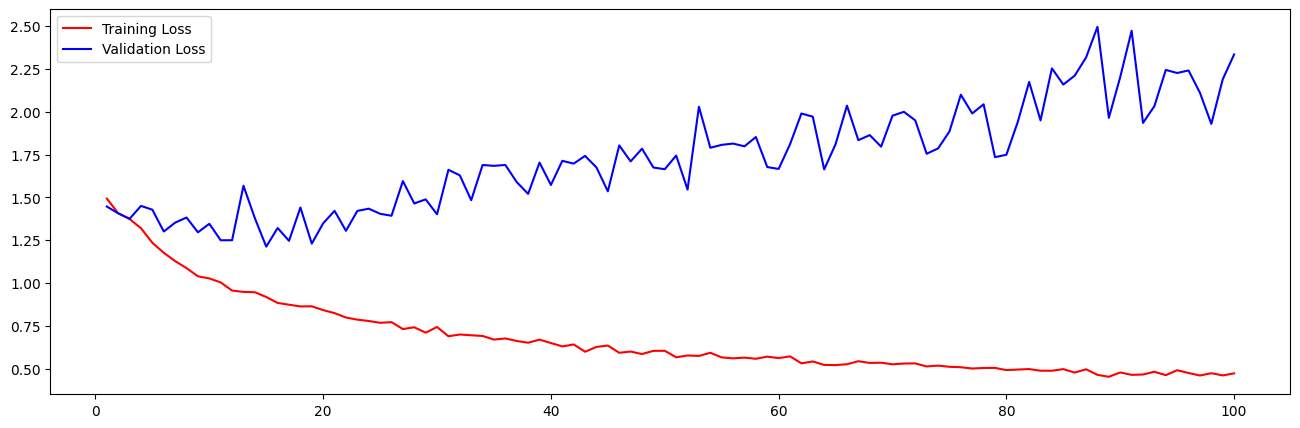

In [ ]:
# Plot Loss Chart
plotLossChart(history_fnn)

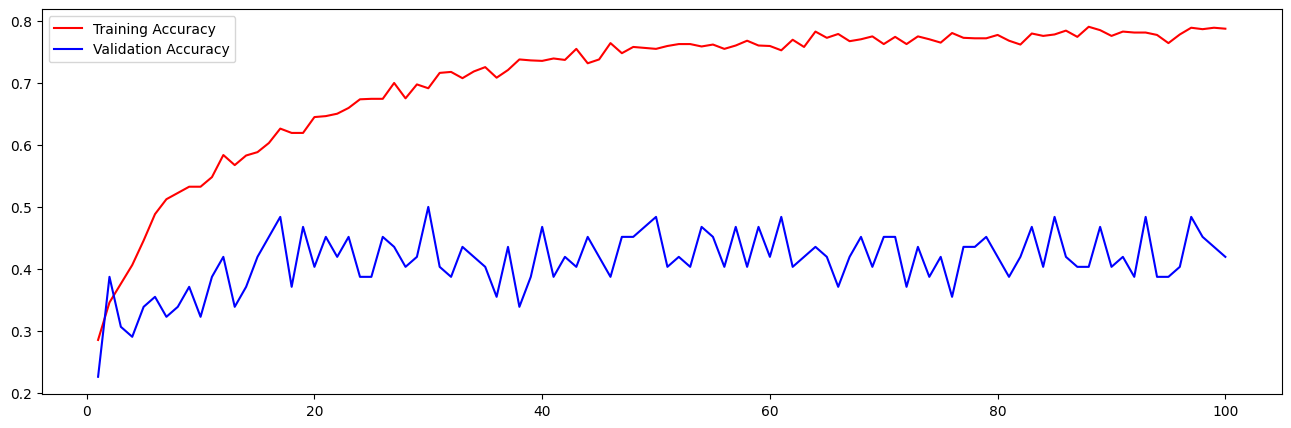

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_fnn)

In [ ]:
# Evaluate the model
accuracy_fnn = round(getAccuracy(model_fnn, X_test, np.array(y_test)), 2)
print('Test Accuracy for FNN is {}%'.format(accuracy_fnn))

2/2 - 1s - 481ms/step - accuracy: 0.4194 - loss: 2.3341
Test Accuracy for FNN is 41.94%


In [ ]:
# Make predictions on validation data
y_pred_val = model_fnn.predict(X_val)
y_pred_class_val = np.argmax(y_pred_val, axis=1)

# # Evaluate model on validation data
# val_loss, val_acc = model_fnn.evaluate(X_val, y_val)
# print(f'Validation accuracy: {val_acc:.2f}')

# Calculate confusion matrix for validation data
conf_mat_val = confusion_matrix(y_val, y_pred_class_val)
print("Validation Confusion Matrix:")
print(conf_mat_val)

# Calculate classification report for validation data
class_rep_val = classification_report(y_val, y_pred_class_val)
print("Validation Classification Report:")
print(class_rep_val)

# Make predictions on test data
y_pred_test = model_fnn.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test, axis=1)

# Evaluate model on test data
test_loss, test_acc = model_fnn.evaluate(X_test, np.array(y_test), verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Calculate confusion matrix for test data
conf_mat_test = confusion_matrix(y_test, y_pred_class_test)
print("Test Confusion Matrix:")
print(conf_mat_test)

# Calculate classification report for test data
class_rep_test = classification_report(y_test, y_pred_class_test)
print("Test Classification Report:")
print(class_rep_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation Confusion Matrix:
[[11  8 12  5  0]
 [10  9 18 16  0]
 [ 7 14 12 21  0]
 [ 3 11 11 20  2]
 [ 2  0  1 11  0]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.31      0.32        36
           1       0.21      0.17      0.19        53
           2       0.22      0.22      0.22        54
           3       0.27      0.43      0.33        47
           4       0.00      0.00      0.00        14

    accuracy                           0.25       204
   macro avg       0.21      0.22      0.21       204
weighted avg       0.24      0.25      0.24       204

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 - 0s - 12ms/step - accuracy: 0.4194 - loss: 2.3341
Test accuracy: 0.42
Test Confusion Matrix:
[[ 6  1  0  0  0]
 [ 4  8  2  1  0]
 [ 4  4  3  5  0]
 [ 1  0 10  7  2]
 [ 0  1  0  1  2]]
Test Classification Report:
              precision    recall  f1-score   support

         

#CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding, Reshape
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the CNN model
model_cnn = Sequential()
# Reshape input data to match the expected shape for Conv1D
model_cnn.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
model_cnn.add(Conv1D(128, kernel_size=3, activation='relu'))  # 1D convolution layer
model_cnn.add(GlobalMaxPooling1D())  # Global max pooling
model_cnn.add(Dropout(0.3))  # Dropout for regularization
model_cnn.add(Dense(64, activation='relu'))  # Fully connected layer
model_cnn.add(Dropout(0.3))  # Dropout for regularization
model_cnn.add(Dense(5, activation='softmax'))  # Output layer for 5 classes

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model_cnn.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 385, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 383, 128)            │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,093 (35.52 KB)

 Trainable params: 9,093 (35.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train the model with input data
history_cnn = model_cnn.fit(
    X_train,  # Use original data
    np.array(y_train),
    batch_size=16,
    epochs=100,
    validation_data=(X_test, np.array(y_test)),  # Use original data
    verbose=2
)

Epoch 1/100
81/81 - 6s - 78ms/step - accuracy: 0.2946 - loss: 1.4830 - val_accuracy: 0.2097 - val_loss: 1.4281
Epoch 2/100
81/81 - 0s - 3ms/step - accuracy: 0.3357 - loss: 1.4305 - val_accuracy: 0.2097 - val_loss: 1.4102
Epoch 3/100
81/81 - 0s - 3ms/step - accuracy: 0.3357 - loss: 1.4153 - val_accuracy: 0.2097 - val_loss: 1.3827
Epoch 4/100
81/81 - 0s - 3ms/step - accuracy: 0.3473 - loss: 1.4161 - val_accuracy: 0.2097 - val_loss: 1.4209
Epoch 5/100
81/81 - 0s - 3ms/step - accuracy: 0.3643 - loss: 1.4005 - val_accuracy: 0.2097 - val_loss: 1.3857
Epoch 6/100
81/81 - 0s - 3ms/step - accuracy: 0.3388 - loss: 1.4085 - val_accuracy: 0.2097 - val_loss: 1.4323
Epoch 7/100
81/81 - 0s - 3ms/step - accuracy: 0.3488 - loss: 1.4060 - val_accuracy: 0.2097 - val_loss: 1.4094
Epoch 8/100
81/81 - 0s - 3ms/step - accuracy: 0.3574 - loss: 1.4085 - val_accuracy: 0.2581 - val_loss: 1.3767
Epoch 9/100
81/81 - 0s - 3ms/step - accuracy: 0.3457 - loss: 1.3952 - val_accuracy: 0.2097 - val_loss: 1.4101
Epoch 10/

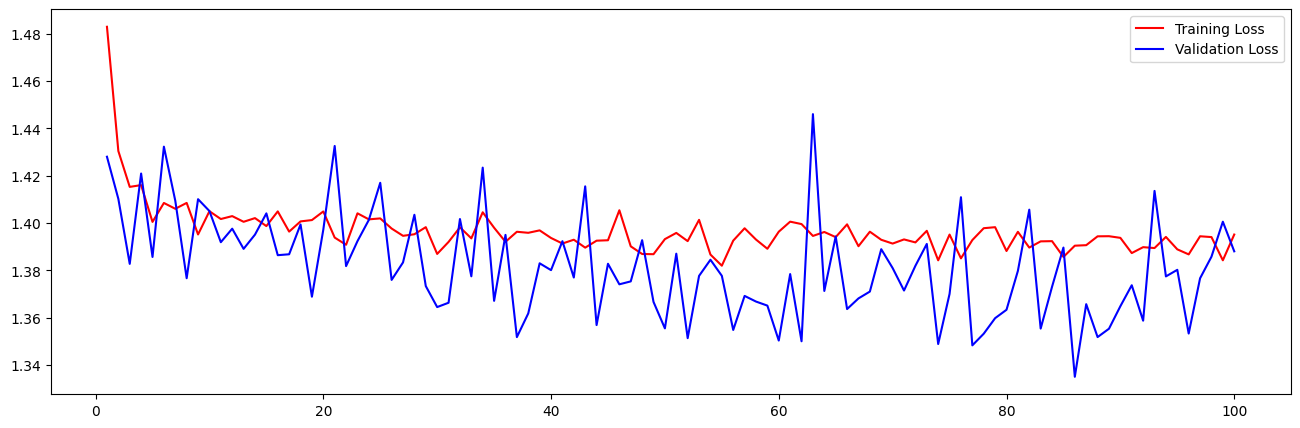

In [ ]:
# Plot Loss Chart
plotLossChart(history_cnn)

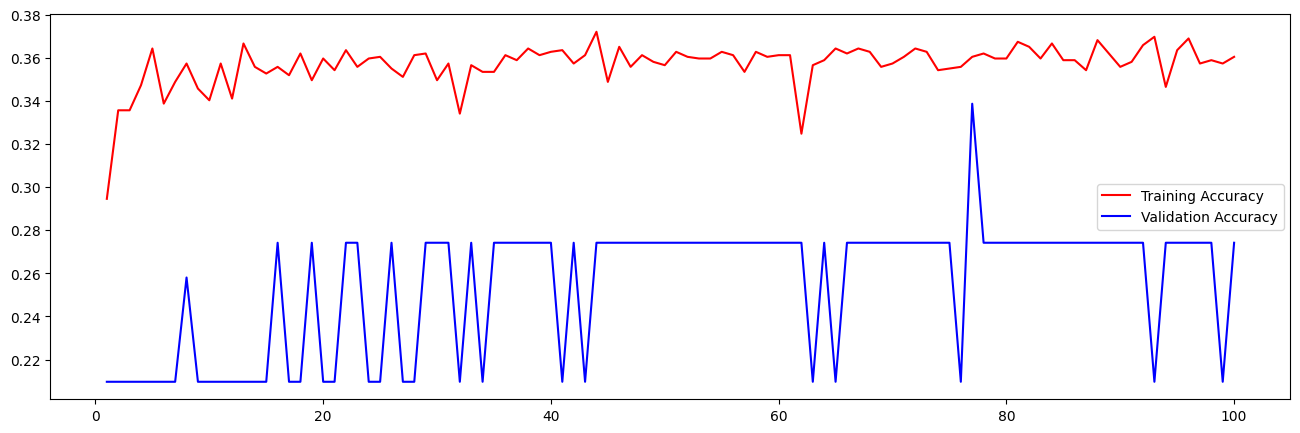

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_cnn)

In [ ]:
# Evaluate the model
accuracy_cnn = round(getAccuracy(model_cnn, X_test, np.array(y_test)), 2)
print('Test Accuracy for CNN is {}%'.format(accuracy_cnn))

2/2 - 1s - 463ms/step - accuracy: 0.2742 - loss: 1.3880
Test Accuracy for CNN is 27.42%


In [ ]:
# Make predictions on validation data
y_pred_val = model_cnn.predict(X_val)
y_pred_class_val = np.argmax(y_pred_val, axis=1)

# # Evaluate model on validation data
# val_loss, val_acc = model_fnn.evaluate(X_val, y_val)
# print(f'Validation accuracy: {val_acc:.2f}')

# Calculate confusion matrix for validation data
conf_mat_val = confusion_matrix(y_val, y_pred_class_val)
print("Validation Confusion Matrix:")
print(conf_mat_val)

# Calculate classification report for validation data
class_rep_val = classification_report(y_val, y_pred_class_val)
print("Validation Classification Report:")
print(class_rep_val)

# Make predictions on test data
y_pred_test = model_cnn.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test, axis=1)

# Evaluate model on test data
test_loss, test_acc = model_cnn.evaluate(X_test, np.array(y_test), verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Calculate confusion matrix for test data
conf_mat_test = confusion_matrix(y_test, y_pred_class_test)
print("Test Confusion Matrix:")
print(conf_mat_test)

# Calculate classification report for test data
class_rep_test = classification_report(y_test, y_pred_class_test)
print("Test Classification Report:")
print(class_rep_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Validation Confusion Matrix:
[[34  0  0  2  0]
 [42  0  0 10  1]
 [40  0  0 13  1]
 [27  0  0 16  4]
 [ 5  0  0  5  4]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.94      0.37        36
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        54
           3       0.35      0.34      0.34        47
           4       0.40      0.29      0.33        14

    accuracy                           0.26       204
   macro avg       0.20      0.31      0.21       204
weighted avg       0.15      0.26      0.17       204

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 - 0s - 11ms/step - accuracy: 0.2742 - loss: 1.3880
Test accuracy: 0.27
Test Confusion Matrix:
[[ 7  0  0  0  0]
 [13  0  0  2  0]
 [13  0  0  3  0]
 [ 8  0  0  7  5]
 [ 1  0  0  0  3]]
Test Classification Report:
              precision    recall  f1-score   support

        

#LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding, Reshape
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the lstm model
model_lstm = Sequential()
# Reshape input data to match the expected shape for Conv1D
model_lstm.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
model_lstm.add(LSTM(30, dropout=0.1, return_sequences=True))
model_lstm.add(LSTM(15, dropout=0.1))
model_lstm.add(Dense(5, activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model_lstm.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 385, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 385, 30)             │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 15)                  │           2,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 5)                   │              80 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,680 (26.09 KB)

 Trainable params: 6,680 (26.09 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history_lstm = model_lstm.fit(X_train, np.array(y_train), batch_size=16, epochs=100, validation_data=(X_test, np.array(y_test)), verbose=2)

Epoch 1/100
81/81 - 6s - 72ms/step - accuracy: 0.1829 - loss: 1.6110 - val_accuracy: 0.2581 - val_loss: 1.6076
Epoch 2/100
81/81 - 2s - 23ms/step - accuracy: 0.1791 - loss: 1.6105 - val_accuracy: 0.3226 - val_loss: 1.6082
Epoch 3/100
81/81 - 2s - 22ms/step - accuracy: 0.1729 - loss: 1.6102 - val_accuracy: 0.1774 - val_loss: 1.6106
Epoch 4/100
81/81 - 2s - 22ms/step - accuracy: 0.1736 - loss: 1.6100 - val_accuracy: 0.2581 - val_loss: 1.6103
Epoch 5/100
81/81 - 2s - 22ms/step - accuracy: 0.1876 - loss: 1.6100 - val_accuracy: 0.1774 - val_loss: 1.6102
Epoch 6/100
81/81 - 2s - 23ms/step - accuracy: 0.1814 - loss: 1.6100 - val_accuracy: 0.2419 - val_loss: 1.6101
Epoch 7/100
81/81 - 2s - 25ms/step - accuracy: 0.1961 - loss: 1.6100 - val_accuracy: 0.3710 - val_loss: 1.6085
Epoch 8/100
81/81 - 2s - 24ms/step - accuracy: 0.1860 - loss: 1.6098 - val_accuracy: 0.2581 - val_loss: 1.6086
Epoch 9/100
81/81 - 2s - 23ms/step - accuracy: 0.1953 - loss: 1.6098 - val_accuracy: 0.3065 - val_loss: 1.6082
E

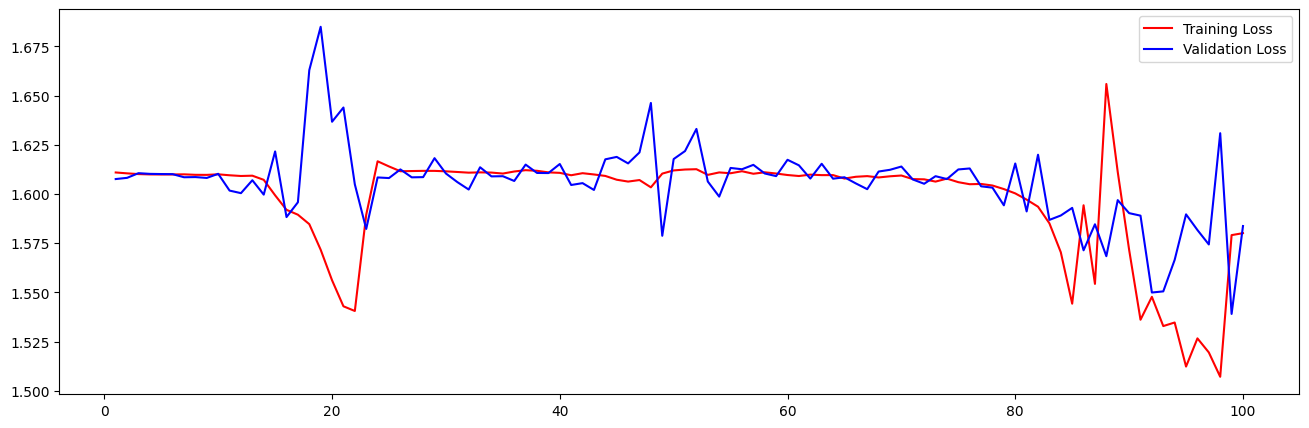

In [ ]:
# Plot Loss Chart
plotLossChart(history_lstm)

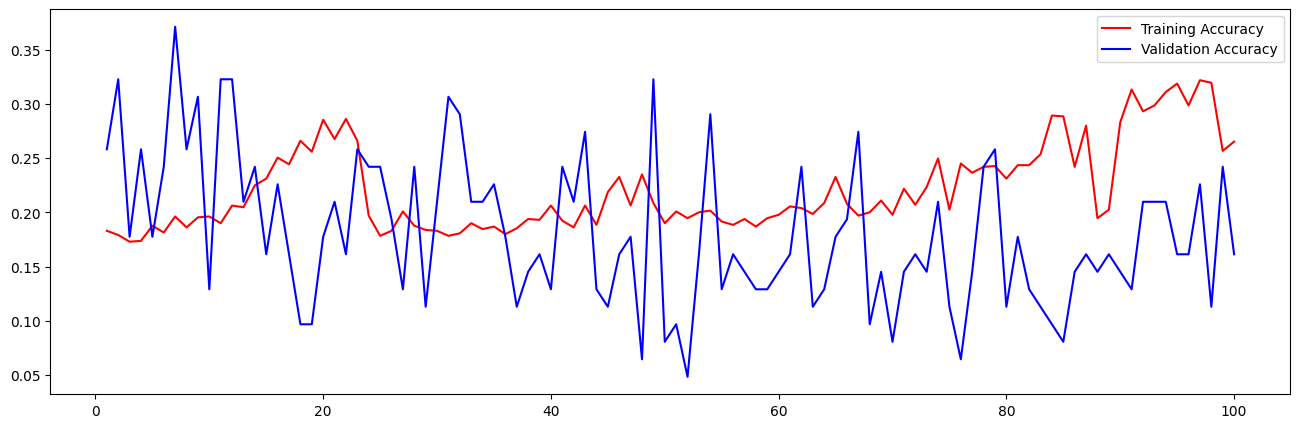

In [ ]:
# Plot Accuracy Chart
plotAccuracyChart(history_lstm)

In [ ]:
# Evaluate the model
accuracy_lstm = round(getAccuracy(model_lstm, X_test, np.array(y_test)), 2)
print('Test Accuracy for LSTM is {}%'.format(accuracy_lstm))

2/2 - 0s - 28ms/step - accuracy: 0.1613 - loss: 1.5766
Test Accuracy for LSTM is 16.13%


In [ ]:
# Make predictions on validation data
y_pred_val = model_lstm.predict(X_val)
y_pred_class_val = np.argmax(y_pred_val, axis=1)

# # Evaluate model on validation data
# val_loss, val_acc = model_fnn.evaluate(X_val, y_val)
# print(f'Validation accuracy: {val_acc:.2f}')

# Calculate confusion matrix for validation data
conf_mat_val = confusion_matrix(y_val, y_pred_class_val)
print("Validation Confusion Matrix:")
print(conf_mat_val)

# Calculate classification report for validation data
class_rep_val = classification_report(y_val, y_pred_class_val)
print("Validation Classification Report:")
print(class_rep_val)

# Make predictions on test data
y_pred_test = model_lstm.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test, axis=1)

# Evaluate model on test data
test_loss, test_acc = model_lstm.evaluate(X_test, np.array(y_test), verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Calculate confusion matrix for test data
conf_mat_test = confusion_matrix(y_test, y_pred_class_test)
print("Test Confusion Matrix:")
print(conf_mat_test)

# Calculate classification report for test data
class_rep_test = classification_report(y_test, y_pred_class_test)
print("Test Classification Report:")
print(class_rep_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Validation Confusion Matrix:
[[14 10  0  0 12]
 [ 9 19  0  2 23]
 [17 18  0  3 16]
 [13 14  0  1 19]
 [ 1  5  0  0  8]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.39      0.31        36
           1       0.29      0.36      0.32        53
           2       0.00      0.00      0.00        54
           3       0.17      0.02      0.04        47
           4       0.10      0.57      0.17        14

    accuracy                           0.21       204
   macro avg       0.16      0.27      0.17       204
weighted avg       0.17      0.21      0.16       204

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 - 0s - 28ms/step - accuracy: 0.1452 - loss: 1.5742
Test accuracy: 0.15
Test Confusion Matrix:
[[ 2  1  0  0  4]
 [ 4  8  0  0  3]
 [ 6  5  0  0  5]
 [ 4  6  0  0 10]
 [ 0  0  0  0  4]]
Test Classification Report:
              precision    recall  f1-score   support

         

# BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Embedding, Reshape
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np

# Creating the BILSTM model
model_bilstm = Sequential()
# Reshape input data to match the expected shape for Conv1D
model_bilstm.add(Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dropout(0.3))
model_bilstm.add(Dense(5, activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model_bilstm.summary())

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_3 (Reshape)                  │ (None, 385, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,437 (134.52 KB)

 Trainable params: 34,437 (134.52 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history_bilstm = model_bilstm.fit(X_train, np.array(y_train), batch_size=16, epochs=100, validation_data=(X_test, np.array(y_test)), verbose=2)

Epoch 1/100
81/81 - 3s - 41ms/step - accuracy: 0.2217 - loss: 1.5873 - val_accuracy: 0.1613 - val_loss: 1.5700
Epoch 2/100
81/81 - 2s - 22ms/step - accuracy: 0.3434 - loss: 1.5090 - val_accuracy: 0.2581 - val_loss: 1.5082
Epoch 3/100
81/81 - 2s - 22ms/step - accuracy: 0.3194 - loss: 1.4519 - val_accuracy: 0.2097 - val_loss: 1.4910
Epoch 4/100
81/81 - 2s - 21ms/step - accuracy: 0.3488 - loss: 1.4229 - val_accuracy: 0.3065 - val_loss: 1.4253
Epoch 5/100
81/81 - 3s - 32ms/step - accuracy: 0.3450 - loss: 1.4146 - val_accuracy: 0.3065 - val_loss: 1.4183
Epoch 6/100
81/81 - 2s - 22ms/step - accuracy: 0.3310 - loss: 1.4113 - val_accuracy: 0.2903 - val_loss: 1.4433
Epoch 7/100
81/81 - 2s - 22ms/step - accuracy: 0.3333 - loss: 1.4070 - val_accuracy: 0.2097 - val_loss: 1.4429
Epoch 8/100
81/81 - 2s - 22ms/step - accuracy: 0.3395 - loss: 1.4077 - val_accuracy: 0.2097 - val_loss: 1.4058
Epoch 9/100
81/81 - 2s - 23ms/step - accuracy: 0.3326 - loss: 1.4053 - val_accuracy: 0.2097 - val_loss: 1.4182
E

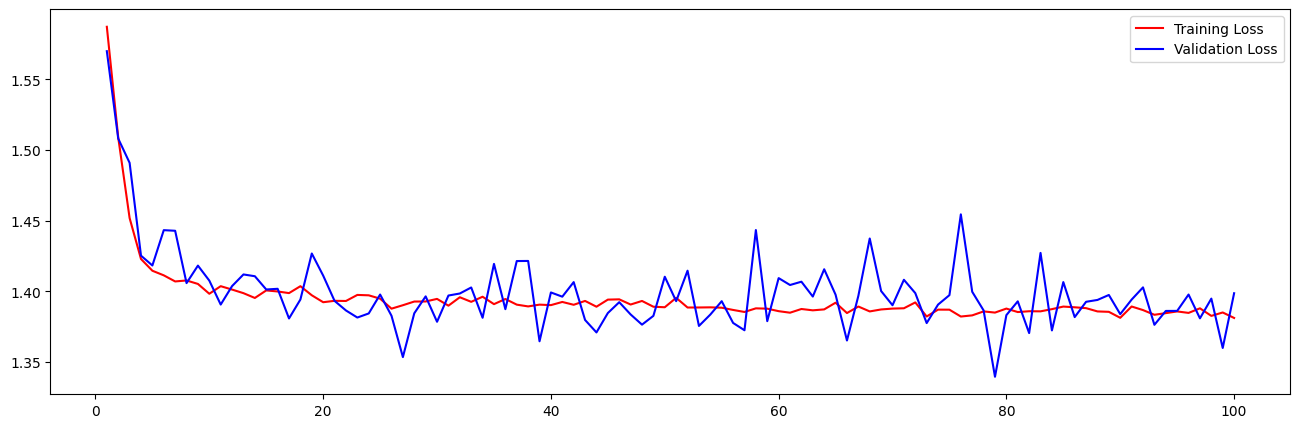

In [ ]:
plotLossChart(history_bilstm)

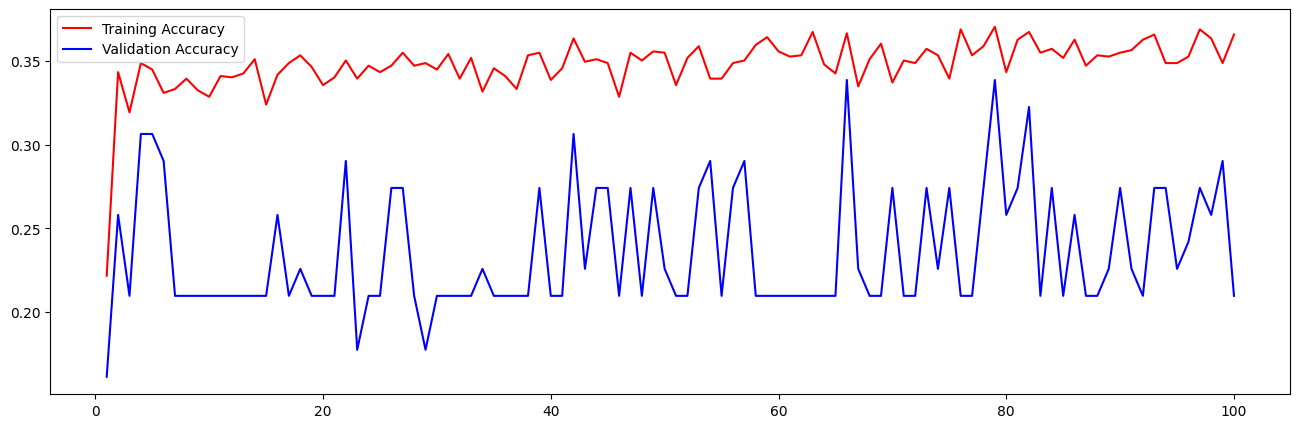

In [ ]:
plotAccuracyChart(history_bilstm)

In [ ]:
accuracy_bilstm = round(getAccuracy(model_bilstm, X_test, np.array(y_test)), 2)
print('Test Accuracy for Bi-LSTM is {}%'.format(accuracy_bilstm))

2/2 - 0s - 31ms/step - accuracy: 0.2097 - loss: 1.3987
Test Accuracy for Bi-LSTM is 20.97%


In [ ]:
# Make predictions on validation data
y_pred_val = model_bilstm.predict(X_val)
y_pred_class_val = np.argmax(y_pred_val, axis=1)

# # Evaluate model on validation data
# val_loss, val_acc = model_fnn.evaluate(X_val, y_val)
# print(f'Validation accuracy: {val_acc:.2f}')

# Calculate confusion matrix for validation data
conf_mat_val = confusion_matrix(y_val, y_pred_class_val)
print("Validation Confusion Matrix:")
print(conf_mat_val)

# Calculate classification report for validation data
class_rep_val = classification_report(y_val, y_pred_class_val)
print("Validation Classification Report:")
print(class_rep_val)

# Make predictions on test data
y_pred_test = model_bilstm.predict(X_test)
y_pred_class_test = np.argmax(y_pred_test, axis=1)

# Evaluate model on test data
test_loss, test_acc = model_bilstm.evaluate(X_test, np.array(y_test), verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Calculate confusion matrix for test data
conf_mat_test = confusion_matrix(y_test, y_pred_class_test)
print("Test Confusion Matrix:")
print(conf_mat_test)

# Calculate classification report for test data
class_rep_test = classification_report(y_test, y_pred_class_test)
print("Test Classification Report:")
print(class_rep_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Validation Confusion Matrix:
[[34  0  0  2  0]
 [42  0  0  9  2]
 [40  0  0 11  3]
 [27  0  0  8 12]
 [ 5  0  0  2  7]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.94      0.37        36
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        54
           3       0.25      0.17      0.20        47
           4       0.29      0.50      0.37        14

    accuracy                           0.24       204
   macro avg       0.15      0.32      0.19       204
weighted avg       0.12      0.24      0.14       204

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 - 0s - 27ms/step - accuracy: 0.2097 - loss: 1.3987
Test accuracy: 0.21
Test Confusion Matrix:
[[ 7  0  0  0  0]
 [13  0  0  2  0]
 [13  0  0  2  1]
 [ 8  0  0  3  9]
 [ 1  0  0  0  3]]
Test Classification Report:
              precision    recall  f1-score   support

         

In [ ]:
results = model_bilstm.evaluate(X_test_lstm, y_test_categorical)  # Evaluate with reshaped data
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3404 - loss: 1.7682 
Test Loss: 1.781003475189209
Test Accuracy: 0.33870968222618103


# Identify the best model and Pickle it

**Best	Method	and	Model**

**Best	Method:	Method	1**

  - Method	1	offers	higher	overall	test	accuracies	for	CNN	(0.74)	and	Bi-LSTM	(0.67),	making	it	the	better	choice	for	models	with	raw	performance	as	the	priority.

  
**Best	Model:**
    
  - If	performance	is	the	priority:	CNN	from	Method	1 (test	accuracy	0.74).
  - If	generalization	and	reliability	are	priorities:	RNN	from	Method	2 (test	accuracy 0.42 with	less	overfitting).

We recommend implementation of Method 2 RNN model on a test basis, aiding decision makers to help guide their responses.

In [ ]:
#accident_level_predictor.pkl refers to potential accident level pickle
import pickle

best_model = model_rnn

with open('accident_level_predictor.pkl', 'wb') as file:
  pickle.dump(best_model, file)

print("Model saved successfully.")

with open('accident_level_predictor.pkl', 'rb') as file:
  loaded_classifier = pickle.load(file)

Model saved successfully.
